In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import graphviz
from scipy import stats
import datetime as dt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Setting size in rows/columns of each df printout
pd.set_option('display.max_rows', 15, 'display.max_columns', 20)

In [2]:
df_2017 = pd.read_csv('sales_byCustomer_2017.csv')
df_2017.head(3)

month customer_name  customer_id billing_country billing_postal_code  \
0  2017-01  Jessica Hite   1744218817   United States          21740-7021   
1  2017-01  Jessica Hite   1744218817   United States          21740-7021   
2  2017-01  Bruce Walker   5767841034   United States               70810   

  billing_region  product_price                    product_title product_type  \
0       Maryland           10.0    USA gray and black soft socks        Socks   
1       Maryland           10.0  American Predator printed socks        Socks   
2      Louisiana            5.0         Icarus Rubrum arm sleeve       Sleeve   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0     Returning       1       2.50         2.50           0.0   
1     Returning       1       2.50         2.50           0.0   
2    First-time       1       4.25         4.25           0.0   

   ordered_item_quantity  average_order_value  
0                      1                 2.50  
1                      1                 2.50  
2                      1                 4.25

In [3]:
df_2018 = pd.read_csv('sales_byCustomer_2018.csv')
df_2018.head(3)

month  customer_name   customer_id billing_country billing_postal_code  \
0  2018-01  Damier Browne  145127309322   United States               07022   
1  2018-01   Daniel Moore  153202720778   United States               61030   
2  2018-01  Damier Browne  145127309322   United States               07022   

  billing_region  product_price                     product_title  \
0     New Jersey            1.0        Dreams Don't Lie Wristband   
1       Illinois           15.0   Thin Blue Line Corrosive Shorts   
2     New Jersey            1.0  EL JEFE Black and Gold Wristband   

  product_type customer_type  orders  net_sales  total_sales  gross_profit  \
0    Wristband     Returning       1        0.5          0.5           0.0   
1       Shorts    First-time       1        9.0          9.0           0.0   
2    Wristband     Returning       1        0.5          0.5           0.0   

   ordered_item_quantity  average_order_value  
0                      1                  0.5  
1                      1                  9.0  
2                      1                  0.5

In [4]:
df_2019 = pd.read_csv('sales_byCustomer_2019.csv')
df_2019.head(3)

month   customer_name    customer_id billing_country billing_postal_code  \
0  2019-01   Jeremy Stroud  1152640417885   United States               72715   
1  2019-01    Liz McDonald  1125624774749   United States               83316   
2  2019-01  Davante Wright  1151398674525   United States               80542   

  billing_region  product_price                    product_title product_type  \
0       Arkansas            0.0                              NaN          NaN   
1          Idaho            0.0                              NaN          NaN   
2       Colorado            2.0  Scorpion Motivational Wristband    Wristband   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0    First-time       0        0.0          0.0           0.0   
1    First-time       0        0.0         -7.0           0.0   
2    First-time       1        0.8          0.8           0.0   

   ordered_item_quantity  average_order_value  
0                      0                  0.0  
1                      0                  0.0  
2                      1                  0.8

In [5]:
df_2020 = pd.read_csv('sales_byCustomer_2020.csv')
df_2020.head(3)

month    customer_id billing_country billing_postal_code billing_region  \
0  2020-07  3440834084957   United States               78572          Texas   
1  2020-07  3440834084957   United States               78572          Texas   
2  2020-07  3440568303709   United States               55305      Minnesota   

   product_price             product_type customer_type  net_sales  \
0           15.0  Mask With Filter Pocket    First-time       15.0   
1            0.0                      NaN    First-time        0.0   
2            0.0                      NaN    First-time        0.0   

   gross_profit  ordered_item_quantity  
0          13.5                      1  
1           0.0                      0  
2           0.0                      0

In [6]:
df_2021 = pd.read_csv('sales_byCustomer_2021-01-01_2021-09-15.csv')
df_2021.head(3)

month    customer_name    customer_id billing_country  \
0  2021-01   Krystal Willis  3384588730461   United States   
1  2021-01   Krystal Willis  3384588730461   United States   
2  2021-01  Melissa DiViaio  3305752985693   United States   

  billing_postal_code billing_region  product_price  \
0               36006        Alabama            7.0   
1               36006        Alabama            7.0   
2               08009     New Jersey            1.0   

                                    product_title product_type customer_type  \
0  Ripped Baseball Kids Face Mask With Nose Shape    Kids Mask     Returning   
1    Baseball Lace Kids Face Mask With Nose Shape    Kids Mask     Returning   
2                         Blue Grunge Neck Gaiter  Neck Gaiter     Returning   

   orders  net_sales  total_sales  gross_profit  ordered_item_quantity  \
0       1        7.0         7.00           5.5                      1   
1       1        7.0         7.00           5.5                      1   
2       1        1.0         1.07           0.0                      1   

   average_order_value  
0                 7.00  
1                 7.00  
2                 1.07

In [7]:
sales_object = [df_2017,df_2018,df_2019,df_2020,df_2021]
sales = pd.concat(sales_object)

display(sales.head(3))
sales.tail(3)

month customer_name  customer_id billing_country billing_postal_code  \
0  2017-01  Jessica Hite   1744218817   United States          21740-7021   
1  2017-01  Jessica Hite   1744218817   United States          21740-7021   
2  2017-01  Bruce Walker   5767841034   United States               70810   

  billing_region  product_price                    product_title product_type  \
0       Maryland           10.0    USA gray and black soft socks        Socks   
1       Maryland           10.0  American Predator printed socks        Socks   
2      Louisiana            5.0         Icarus Rubrum arm sleeve       Sleeve   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0     Returning     1.0       2.50         2.50           0.0   
1     Returning     1.0       2.50         2.50           0.0   
2    First-time     1.0       4.25         4.25           0.0   

   ordered_item_quantity  average_order_value  
0                      1                 2.50  
1                      1                 2.50  
2                      1                 4.25

month    customer_name    customer_id billing_country  \
454548  2021-09     James Giggar     4983454666   United States   
454549  2021-09   Mike Jeffcoach  5190280740957   United States   
454550  2021-09  Kimberly Bindas  3484751200349   United States   

       billing_postal_code billing_region  product_price  \
454548               53222      Wisconsin           2.00   
454549               93210     California           0.98   
454550               02770  Massachusetts           1.00   

                                 product_title         product_type  \
454548      Checkers Yellow Black Casual Socks                Socks   
454549                     Shipping Protection  Purchase Protection   
454550  White Dots and Red Kids Flat Face Mask            Kids Mask   

       customer_type  orders  net_sales  total_sales  gross_profit  \
454548     Returning     1.0       2.00         2.11           1.0   
454549    First-time     1.0       0.98         0.98           0.0   
454550     Returning     1.0       1.00         1.00          -0.5   

        ordered_item_quantity  average_order_value  
454548                      1                 2.11  
454549                      1                 0.98  
454550                      1                 1.00

In [8]:
del sales_object
del df_2017
del df_2018
del df_2019
del df_2020
del df_2021

##### filling 0s and NAs

In [9]:
# positive Orders 
sales = sales[sales['ordered_item_quantity']>0]

In [10]:
# positive Sales 
sales = sales[sales['net_sales']>0]

In [12]:
# where there is product info (i.e. not NA)

In [13]:
sales.product_type.nunique()

148

In [14]:
sales.product_type.isna().sum()

367

In [15]:
sales[sales.product_type.isna()].head(4)

month    customer_name  customer_id billing_country  \
2740   2017-01    Julie Roberts   4870694602   United States   
6755   2017-01    Ethan Monjure   5807501706   United States   
12549  2017-01   Luis Rodriguez   5799275978   United States   
21625  2017-01  Jon  Murchinson   5789545930   United States   

      billing_postal_code billing_region  product_price  \
2740                02888   Rhode Island           20.0   
6755           30019-3105        Georgia           20.0   
12549               33314        Florida            6.0   
21625               94118     California            5.0   

                        product_title product_type customer_type  orders  \
2740   Difference for tights SL155079          NaN     Returning     1.0   
6755             DAB Black arm sleeve          NaN    First-time     1.0   
12549                        Shipping          NaN    First-time     1.0   
21625            Shipping for samples          NaN    First-time     1.0   

       net_sales  total_sales  gross_profit  ordered_item_quantity  \
2740        20.0         20.0           0.0                      1   
6755        20.0         20.0           0.0                      1   
12549        6.0          6.0           0.0                      1   
21625        5.0          5.0           0.0                      1   

       average_order_value  
2740                  20.0  
6755                  20.0  
12549                  6.0  
21625                  5.0

In [11]:
sales['product_type'].fillna('NoRecord', inplace=True)

In [12]:
sales.product_type.isna().sum()

0

In [18]:
sales[sales.product_type.isna()].head(4)

Empty DataFrame
Columns: [month, customer_name, customer_id, billing_country, billing_postal_code, billing_region, product_price, product_title, product_type, customer_type, orders, net_sales, total_sales, gross_profit, ordered_item_quantity, average_order_value]
Index: []

#### Formatting df

In [13]:
sales.month = pd.to_datetime(sales.month)
sales.dtypes

month                    datetime64[ns]
customer_name                    object
customer_id                       int64
billing_country                  object
billing_postal_code              object
billing_region                   object
product_price                   float64
product_title                    object
product_type                     object
customer_type                    object
orders                          float64
net_sales                       float64
total_sales                     float64
gross_profit                    float64
ordered_item_quantity             int64
average_order_value             float64
dtype: object

In [20]:
sales.groupby('customer_id')['month'].max()

customer_id
0               2020-02-01
270354897       2021-07-01
278902437       2017-04-01
278971193       2017-01-01
279089689       2018-05-01
                   ...    
5193320562781   2021-09-01
5193320792157   2021-09-01
5193321414749   2021-09-01
5193321775197   2021-09-01
5193322987613   2021-09-01
Name: month, Length: 396057, dtype: datetime64[ns]

In [21]:
sales.groupby('customer_id')['month'].min()

customer_id
0               2017-01-01
270354897       2021-07-01
278902437       2017-04-01
278971193       2017-01-01
279089689       2018-05-01
                   ...    
5193320562781   2021-09-01
5193320792157   2021-09-01
5193321414749   2021-09-01
5193321775197   2021-09-01
5193322987613   2021-09-01
Name: month, Length: 396057, dtype: datetime64[ns]

In [22]:
# number of clients
sales.customer_id.nunique()

396057

In [14]:
# Cohort Month (earliest purchase by each client)
grouping = sales.groupby('customer_id')['month']

sales['CohortMonth'] = grouping.transform('min'); 

In [24]:
sales[['customer_id','month','CohortMonth']].tail()

customer_id      month CohortMonth
454546     4623156743 2021-09-01  2017-02-01
454547     6684451466 2021-09-01  2017-07-01
454548     4983454666 2021-09-01  2018-04-01
454549  5190280740957 2021-09-01  2021-09-01
454550  3484751200349 2021-09-01  2020-08-01

In [15]:
def get_date(df,column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return year, month, day

In [16]:
# get year/month/day for each transaction since 2017
invoice_year, invoice_month, invoice_date = get_date(sales,'month')

In [27]:
invoice_year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
454546    2021
454547    2021
454548    2021
454549    2021
454550    2021
Name: month, Length: 1362214, dtype: int64

In [28]:
invoice_month

0         1
1         1
2         1
3         1
4         1
         ..
454546    9
454547    9
454548    9
454549    9
454550    9
Name: month, Length: 1362214, dtype: int64

In [17]:
# get year/month/day for earliest transaction of each client since 2017
cohort_year, cohort_month, cohort_date = get_date(sales,'CohortMonth')

In [30]:
cohort_year

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
454546    2017
454547    2017
454548    2018
454549    2021
454550    2020
Name: CohortMonth, Length: 1362214, dtype: int64

In [31]:
cohort_month

0         1
1         1
2         1
3         1
4         1
         ..
454546    2
454547    7
454548    4
454549    9
454550    8
Name: CohortMonth, Length: 1362214, dtype: int64

In [18]:
# Calculating the difference in years/months of each transaction's client's earliest purchase and transaction date
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [33]:
months_diff

0         0
1         0
2         0
3         0
4         0
         ..
454546    7
454547    2
454548    5
454549    0
454550    1
Length: 1362214, dtype: int64

In [19]:
# CohortIndex i.e. difference in months of each transaction's vs the transaction's-client's earliest one ( unit is in months )
sales['CohortIndex'] = years_diff*12 + months_diff #+ 1

sales[['CohortIndex']]

CohortIndex
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
454546           55
454547           50
454548           41
454549            0
454550           13

[1362214 rows x 1 columns]

In [35]:
sales.groupby(['CohortMonth','CohortIndex'])[['orders']].sum().head(14)

orders
CohortMonth CohortIndex         
2017-01-01  0            15959.0
            1             1226.0
            2              931.0
            3              809.0
            4              733.0
            5              882.0
            6              757.0
            7              667.0
            8              777.0
            9              591.0
            10            1279.0
            11             823.0
            12             662.0
            13             240.0

In [20]:
# how many different clients are in each CohortIndex, within each Cohort Month
sales.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).head(14)

CohortMonth  CohortIndex
2017-01-01   0              5448
             1               383
             2               276
             3               225
             4               207
             5               200
             6               173
             7               161
             8               200
             9               166
             10              264
             11              177
             12              175
             13               87
Name: customer_id, dtype: int64

In [21]:
# Cohort DataFrame: How many different clients are for eacg CohortMonth's Cohort Index
cohort_data = sales.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()

display(cohort_data.head(4))
display(cohort_data.tail(4))

""" customer_id column is actually showing Total Number of different clients en each CohortIndex  """

CohortMonth  CohortIndex  customer_id
0  2017-01-01            0         5448
1  2017-01-01            1          383
2  2017-01-01            2          276
3  2017-01-01            3          225

CohortMonth  CohortIndex  customer_id
1649  2021-07-01            2          232
1650  2021-08-01            0        16332
1651  2021-08-01            1          726
1652  2021-09-01            0         7404

' customer_id column is actually showing Total Number of different clients en each CohortIndex  '

In [22]:
# Cohort DataFrame Pivoted
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                  columns = 'CohortIndex',
                                  values='customer_id')

""" customer_id column is actually showing Total Number of different clients en each CohortIndex  """

' customer_id column is actually showing Total Number of different clients en each CohortIndex  '

In [39]:
cohort_counts

CohortIndex       0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                    
2017-01-01    5448.0  383.0  276.0  225.0  207.0  200.0  173.0  161.0  200.0   
2017-02-01    4854.0  318.0  204.0  192.0  169.0  123.0  137.0  147.0  129.0   
2017-03-01    5571.0  361.0  208.0  175.0  163.0  177.0  169.0  161.0  208.0   
2017-04-01    4624.0  252.0  198.0  158.0  166.0  160.0  155.0  175.0  108.0   
2017-05-01    4052.0  230.0  168.0  152.0  128.0  166.0  158.0   97.0   79.0   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-05-01    4449.0  165.0  141.0  156.0   85.0    NaN    NaN    NaN    NaN   
2021-06-01    4476.0  253.0  190.0   96.0    NaN    NaN    NaN    NaN    NaN   
2021-07-01    8270.0  569.0  232.0    NaN    NaN    NaN    NaN    NaN    NaN   
2021-08-01   16332.0  726.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-09-01    7404.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     9   ...    47    48    49    50    51    52    53    54    55  \
CohortMonth         ...                                                         
2017-01-01   166.0  ...  49.0  46.0  29.0  24.0  19.0  14.0  23.0  21.0  26.0   
2017-02-01   172.0  ...  35.0  29.0  11.0  11.0  15.0  15.0  18.0  23.0  18.0   
2017-03-01   165.0  ...  22.0  20.0  26.0  18.0  17.0  12.0  27.0  17.0   NaN   
2017-04-01   100.0  ...  17.0  22.0  13.0  18.0  15.0  21.0  18.0   NaN   NaN   
2017-05-01    53.0  ...  14.0  13.0  12.0  22.0  23.0  11.0   NaN   NaN   NaN   
...            ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2021-05-01     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2021-06-01     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2021-07-01     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2021-08-01     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2021-09-01     NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    56  
CohortMonth        
2017-01-01   22.0  
2017-02-01    NaN  
2017-03-01    NaN  
2017-04-01    NaN  
2017-05-01    NaN  
...           ...  
2021-05-01    NaN  
2021-06-01    NaN  
2021-07-01    NaN  
2021-08-01    NaN  
2021-09-01    NaN  

[57 rows x 57 columns]

In [40]:
#pd.set_option('display.max_rows', 10, 'display.max_columns', 30)
sales.head(3)

month customer_name  customer_id billing_country billing_postal_code  \
0 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   
1 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   
2 2017-01-01  Bruce Walker   5767841034   United States               70810   

  billing_region  product_price                    product_title product_type  \
0       Maryland           10.0    USA gray and black soft socks        Socks   
1       Maryland           10.0  American Predator printed socks        Socks   
2      Louisiana            5.0         Icarus Rubrum arm sleeve       Sleeve   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0     Returning     1.0       2.50         2.50           0.0   
1     Returning     1.0       2.50         2.50           0.0   
2    First-time     1.0       4.25         4.25           0.0   

   ordered_item_quantity  average_order_value CohortMonth  CohortIndex  
0                      1                 2.50  2017-01-01            0  
1                      1                 2.50  2017-01-01            0  
2                      1                 4.25  2017-01-01            0

In [23]:
# Number of clients that made their first transaction (CohortIndex=0) in each month (CohortMonth_t)
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

CohortMonth
2017-01-01     5448.0
2017-02-01     4854.0
2017-03-01     5571.0
2017-04-01     4624.0
2017-05-01     4052.0
2017-06-01     6166.0
2017-07-01     4649.0
2017-08-01     5089.0
2017-09-01     5872.0
2017-10-01     4914.0
2017-11-01     5483.0
2017-12-01     5832.0
2018-01-01     3701.0
2018-02-01     3034.0
2018-03-01     4133.0
2018-04-01     4043.0
2018-05-01     4310.0
2018-06-01     4240.0
2018-07-01     5904.0
2018-08-01     6543.0
2018-09-01     5587.0
2018-10-01     5076.0
2018-11-01     6910.0
2018-12-01     6273.0
2019-01-01     4881.0
2019-02-01     4829.0
2019-03-01     5821.0
2019-04-01     5207.0
2019-05-01     4766.0
2019-06-01     5628.0
2019-07-01     6813.0
2019-08-01    10220.0
2019-09-01     7885.0
2019-10-01    11787.0
2019-11-01     6902.0
2019-12-01     6164.0
2020-01-01     4364.0
2020-02-01     4958.0
2020-03-01     3979.0
2020-04-01     6499.0
2020-05-01     9773.0
2020-06-01    15172.0
2020-07-01    20281.0
2020-08-01    15477.0
2020-09-01    13315.

In [24]:
retention = cohort_counts.divide(cohort_sizes,axis=0).round(3)*100
retention

CohortIndex     0    1    2    3    4    5    6    7    8    9   ...   47  \
CohortMonth                                                      ...        
2017-01-01   100.0  7.0  5.1  4.1  3.8  3.7  3.2  3.0  3.7  3.0  ...  0.9   
2017-02-01   100.0  6.6  4.2  4.0  3.5  2.5  2.8  3.0  2.7  3.5  ...  0.7   
2017-03-01   100.0  6.5  3.7  3.1  2.9  3.2  3.0  2.9  3.7  3.0  ...  0.4   
2017-04-01   100.0  5.4  4.3  3.4  3.6  3.5  3.4  3.8  2.3  2.2  ...  0.4   
2017-05-01   100.0  5.7  4.1  3.8  3.2  4.1  3.9  2.4  1.9  1.3  ...  0.3   
2017-06-01   100.0  4.9  3.1  2.7  2.3  3.1  2.1  2.0  0.9  1.0  ...  0.2   
2017-07-01   100.0  7.4  5.0  4.0  3.8  2.6  1.6  1.1  1.1  1.1  ...  0.4   
2017-08-01   100.0  7.9  3.9  3.4  2.4  1.9  1.2  1.4  1.3  1.6  ...  0.5   
2017-09-01   100.0  6.4  5.2  2.7  2.5  1.4  1.6  1.4  1.7  1.1  ...  1.0   
2017-10-01   100.0  6.7  3.1  2.7  1.6  1.7  1.2  1.7  1.0  1.7  ...  0.5   
2017-11-01   100.0  6.3  3.9  1.7  2.0  1.5  1.6  1.0  1.9  1.2  ...  NaN   
2017-12-01   100.0  4.7  1.8  1.5  1.1  1.2  0.8  1.1  1.1  0.8  ...  NaN   
2018-01-01   100.0  5.3  3.3  2.4  2.1  1.5  2.6  1.9  1.8  2.0  ...  NaN   
2018-02-01   100.0  6.8  2.9  2.7  1.8  1.6  1.8  0.9  1.2  2.1  ...  NaN   
2018-03-01   100.0  5.3  3.0  1.8  2.6  2.0  1.6  1.3  1.9  1.5  ...  NaN   
2018-04-01   100.0  5.9  2.6  2.9  2.0  2.0  2.0  2.1  1.3  1.1  ...  NaN   
2018-05-01   100.0  6.0  4.1  2.8  1.9  2.3  2.1  1.6  1.5  1.5  ...  NaN   
2018-06-01   100.0  7.6  3.7  2.8  2.1  2.2  1.7  1.2  1.1  1.5  ...  NaN   
2018-07-01   100.0  6.1  3.1  2.6  2.4  1.5  1.3  1.1  1.4  1.1  ...  NaN   
2018-08-01   100.0  5.7  3.4  2.8  1.7  1.4  1.4  1.3  1.1  0.9  ...  NaN   
2018-09-01   100.0  5.9  4.5  1.9  1.4  1.4  1.2  1.2  1.1  1.1  ...  NaN   
2018-10-01   100.0  6.7  2.7  2.0  1.6  1.5  1.2  1.1  1.0  0.9  ...  NaN   
2018-11-01   100.0  5.7  2.9  2.1  2.0  1.2  1.4  0.9  1.2  1.3  ...  NaN   
2018-12-01   100.0  4.9  2.6  1.9  1.3  1.2  0.9  1.1  1.3  0.9  ...  NaN   
2019-01-01   100.0  6.1  2.9  1.8  1.6  1.7  1.1  1.5  1.1  1.2  ...  NaN   
2019-02-01   100.0  6.6  2.5  2.5  1.8  1.6  1.4  1.2  1.2  1.8  ...  NaN   
2019-03-01   100.0  4.6  3.0  2.0  1.8  1.5  1.4  1.3  1.8  1.0  ...  NaN   
2019-04-01   100.0  5.2  3.1  2.0  1.8  1.7  1.4  1.5  1.1  0.9  ...  NaN   
2019-05-01   100.0  4.9  3.0  1.9  1.7  1.4  1.8  1.0  1.0  1.0  ...  NaN   
2019-06-01   100.0  5.4  2.9  2.4  1.5  2.0  1.2  1.3  1.2  1.3  ...  NaN   
2019-07-01   100.0  5.7  2.7  2.0  2.0  1.1  1.3  1.2  1.3  1.6  ...  NaN   
2019-08-01   100.0  5.1  3.0  1.8  1.2  0.8  1.0  0.9  1.1  0.9  ...  NaN   
2019-09-01   100.0  4.3  2.5  1.2  1.1  1.1  1.0  1.3  1.0  1.2  ...  NaN   
2019-10-01   100.0  3.1  1.5  0.8  0.9  0.5  1.3  1.0  1.1  1.0  ...  NaN   
2019-11-01   100.0  5.0  2.6  2.0  1.7  2.1  1.8  1.6  2.0  1.6  ...  NaN   
2019-12-01   100.0  4.0  2.1  1.8  2.2  1.6  1.4  1.3  1.3  1.4  ...  NaN   
2020-01-01   100.0  5.8  2.9  3.0  1.8  1.6  1.5  1.4  2.1  1.6  ...  NaN   
2020-02-01   100.0  5.1  3.4  2.2  1.9  2.0  1.6  2.2  1.9  1.9  ...  NaN   
2020-03-01   100.0  5.0  3.2  2.4  2.0  1.7  2.1  1.9  2.4  2.0  ...  NaN   
2020-04-01   100.0  8.4  3.8  3.8  2.4  1.8  2.0  2.2  1.2  1.8  ...  NaN   
2020-05-01   100.0  7.1  5.4  3.2  2.7  2.1  2.2  1.3  2.2  1.1  ...  NaN   
2020-06-01   100.0  9.1  4.5  3.6  3.3  3.1  1.5  2.2  1.1  1.3  ...  NaN   
2020-07-01   100.0  6.6  4.0  3.4  3.2  1.8  2.5  1.2  1.1  1.0  ...  NaN   
2020-08-01   100.0  6.0  3.8  3.6  1.8  2.2  1.3  1.1  1.0  0.6  ...  NaN   
2020-09-01   100.0  5.9  4.1  1.9  2.5  1.3  1.6  1.1  0.7  0.8  ...  NaN   
2020-10-01   100.0  5.9  2.3  3.0  1.5  1.5  1.2  0.9  0.7  1.2  ...  NaN   
2020-11-01   100.0  4.5  3.8  1.8  1.9  1.3  0.8  0.8  1.0  1.9  ...  NaN   
2020-12-01   100.0  4.8  2.2  2.2  1.1  1.0  0.7  1.1  1.4  0.8  ...  NaN   
2021-01-01   100.0  4.6  2.9  1.9  1.2  1.0  1.2  2.3  1.5  NaN  ...  NaN   
2021-02-01   100.0  5.8  2.0  1.2  1.0  1.2  2.9  1.1  NaN  NaN  ...  NaN

In [26]:
retention.iloc[:,1:].max().sort_values(ascending=False)

CohortIndex
1     9.1
2     5.4
10    4.8
3     4.1
5     4.1
     ... 
54    0.5
55    0.5
52    0.5
50    0.5
56    0.4
Length: 56, dtype: float64

In [44]:
cohort_data

CohortMonth  CohortIndex  customer_id
0     2017-01-01            0         5448
1     2017-01-01            1          383
2     2017-01-01            2          276
3     2017-01-01            3          225
4     2017-01-01            4          207
...          ...          ...          ...
1648  2021-07-01            1          569
1649  2021-07-01            2          232
1650  2021-08-01            0        16332
1651  2021-08-01            1          726
1652  2021-09-01            0         7404

[1653 rows x 3 columns]

In [27]:
# Cohort Quantity DataFrame: for each CohortMonth's Cohort Index how many orders (on avg) were done
cohort_q_data = sales.groupby(['CohortMonth','CohortIndex'])[['ordered_item_quantity']].mean().reset_index()
cohort_q_data

CohortMonth  CohortIndex  ordered_item_quantity
0     2017-01-01            0               1.270235
1     2017-01-01            1               1.239274
2     2017-01-01            2               1.564885
3     2017-01-01            3               1.393258
4     2017-01-01            4               1.248957
...          ...          ...                    ...
1648  2021-07-01            1               1.406940
1649  2021-07-01            2               1.310094
1650  2021-08-01            0               1.280863
1651  2021-08-01            1               1.462093
1652  2021-09-01            0               1.432366

[1653 rows x 3 columns]

In [28]:
avg_q = cohort_q_data.pivot(index='CohortMonth',columns='CohortIndex',values='ordered_item_quantity')
avg_q.round(1)

CohortIndex   0    1    2    3    4    5    6    7    8    9   ...   47   48  \
CohortMonth                                                    ...             
2017-01-01   1.3  1.2  1.6  1.4  1.2  1.3  1.6  1.7  1.5  1.5  ...  2.7  1.6   
2017-02-01   1.3  1.5  1.5  1.3  2.6  1.3  1.9  1.9  1.7  1.6  ...  2.5  1.9   
2017-03-01   1.2  1.4  1.3  1.2  1.4  1.3  1.4  1.4  1.8  1.5  ...  1.1  1.5   
2017-04-01   1.2  1.4  1.4  1.4  1.3  1.4  1.4  1.5  1.7  1.2  ...  1.4  1.3   
2017-05-01   1.2  1.2  1.1  1.3  1.2  1.2  1.4  1.3  1.1  1.2  ...  1.3  1.9   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2021-05-01   1.4  1.7  1.3  1.4  1.3  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2021-06-01   1.3  1.3  1.3  1.5  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2021-07-01   1.3  1.4  1.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2021-08-01   1.3  1.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2021-09-01   1.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

CohortIndex   49   50   51   52   53   54   55   56  
CohortMonth                                          
2017-01-01   1.5  2.0  1.1  1.0  1.5  1.1  1.7  1.4  
2017-02-01   1.1  1.3  1.1  2.7  1.3  2.6  1.9  NaN  
2017-03-01   1.5  1.9  1.1  1.2  2.0  1.4  NaN  NaN  
2017-04-01   1.9  1.5  1.5  1.0  1.4  NaN  NaN  NaN  
2017-05-01   1.1  1.2  1.2  1.3  NaN  NaN  NaN  NaN  
...          ...  ...  ...  ...  ...  ...  ...  ...  
2021-05-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-06-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-07-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-08-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[57 rows x 57 columns]

In [29]:
def month_extract(x):
    return x.month

pd.Series(retention.index.values).apply(month_extract)

0     1
1     2
2     3
3     4
4     5
     ..
52    5
53    6
54    7
55    8
56    9
Length: 57, dtype: int64

In [224]:
retention

CohortIndex     0    1    2    3    4    5    6    7    8    9   ...   47  \
CohortMonth                                                      ...        
2017-01-01   100.0  7.0  5.1  4.1  3.8  3.7  3.2  3.0  3.7  3.0  ...  0.9   
2017-02-01   100.0  6.6  4.2  4.0  3.5  2.5  2.8  3.0  2.7  3.5  ...  0.7   
2017-03-01   100.0  6.5  3.7  3.1  2.9  3.2  3.0  2.9  3.7  3.0  ...  0.4   
2017-04-01   100.0  5.4  4.3  3.4  3.6  3.5  3.4  3.8  2.3  2.2  ...  0.4   
2017-05-01   100.0  5.7  4.1  3.8  3.2  4.1  3.9  2.4  1.9  1.3  ...  0.3   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2021-05-01   100.0  3.7  3.2  3.5  1.9  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2021-06-01   100.0  5.7  4.2  2.1  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2021-07-01   100.0  6.9  2.8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2021-08-01   100.0  4.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
2021-09-01   100.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

CohortIndex   48   49   50   51   52   53   54   55   56  
CohortMonth                                               
2017-01-01   0.8  0.5  0.4  0.3  0.3  0.4  0.4  0.5  0.4  
2017-02-01   0.6  0.2  0.2  0.3  0.3  0.4  0.5  0.4  NaN  
2017-03-01   0.4  0.5  0.3  0.3  0.2  0.5  0.3  NaN  NaN  
2017-04-01   0.5  0.3  0.4  0.3  0.5  0.4  NaN  NaN  NaN  
2017-05-01   0.3  0.3  0.5  0.6  0.3  NaN  NaN  NaN  NaN  
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  
2021-05-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-06-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-07-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-08-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[57 rows x 57 columns]

#### Finding Monthly Retention Patterns

In [175]:
retention.index.month==8

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False])

In [177]:
retention[retention.index.month==8].iloc[:,1:]

CohortIndex   1    2    3    4    5    6    7    8    9    10  ...   47   48  \
CohortMonth                                                    ...             
2017-08-01   7.9  3.9  3.4  2.4  1.9  1.2  1.4  1.3  1.6  0.9  ...  0.5  0.8   
2018-08-01   5.7  3.4  2.8  1.7  1.4  1.4  1.3  1.1  0.9  1.2  ...  NaN  NaN   
2019-08-01   5.1  3.0  1.8  1.2  0.8  1.0  0.9  1.1  0.9  1.1  ...  NaN  NaN   
2020-08-01   6.0  3.8  3.6  1.8  2.2  1.3  1.1  1.0  0.6  0.6  ...  NaN  NaN   
2021-08-01   4.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

CohortIndex   49  50  51  52  53  54  55  56  
CohortMonth                                   
2017-08-01   0.3 NaN NaN NaN NaN NaN NaN NaN  
2018-08-01   NaN NaN NaN NaN NaN NaN NaN NaN  
2019-08-01   NaN NaN NaN NaN NaN NaN NaN NaN  
2020-08-01   NaN NaN NaN NaN NaN NaN NaN NaN  
2021-08-01   NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 56 columns]

In [180]:
retention[retention.index.month==8].iloc[:,1:].mean(axis=0)[:12]

CohortIndex
1     5.820
2     3.525
3     2.900
4     1.775
5     1.575
6     1.225
7     1.175
8     1.125
9     1.000
10    0.950
11    1.375
12    2.125
dtype: float64

In [30]:
retention_month_avg = pd.DataFrame(index=range(1,13),columns=range(1,13))
retention_month_avg

1    2    3    4    5    6    7    8    9   10   11   12
1   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [31]:
retention_month_avg.index.name = 'Purchased Month'
retention_month_avg.columns.name = 'Future Months'
retention_month_avg

Future Months      1    2    3    4    5    6    7    8    9   10   11   12
Purchased Month                                                            
1                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
10               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
11               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
12               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [223]:
retention.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
             4,  5,  6,  7,  8,  9],
           dtype='int64', name='CohortMonth')

In [245]:
retention[retention.index.month==i].iloc[:,8:].mean(axis=0)[:12]

CohortIndex
8     1.275000
9     0.975000
10    1.066667
11    2.000000
12    1.700000
13    0.900000
14    0.700000
15    0.766667
16    0.833333
17    0.700000
18    0.633333
19    0.733333
dtype: float64

In [32]:
for i in range(1,13):
    #print(i)
    retention_month_avg.iloc[:,i-1] = retention[retention.index.month==i].iloc[:,1:].mean(axis=0)[:12]

In [33]:
retention_month_avg.T.round(1)

Purchased Month    1    2    3    4    5    6    7    8    9   10   11   12
Future Months                                                              
1                5.8  3.4  2.6  2.1  1.9  1.9  2.0  2.0  2.0  2.8  1.9  1.8
2                6.2  3.0  2.5  2.0  1.8  2.1  1.7  1.8  2.3  1.8  1.7  1.3
3                5.0  2.9  2.1  2.1  2.3  1.9  1.8  2.4  1.9  1.6  1.3  1.6
4                5.7  3.1  2.8  2.4  2.1  2.2  2.4  1.5  1.5  1.1  1.5  1.3
5                5.5  4.0  3.0  2.3  2.5  2.5  1.6  1.6  1.2  1.3  1.4  1.5
6                6.5  3.7  2.7  2.3  2.6  1.6  1.7  1.1  1.3  1.1  1.2  1.2
7                6.5  3.5  3.0  2.8  1.7  1.7  1.2  1.2  1.2  1.1  1.2  1.7
8                5.8  3.5  2.9  1.8  1.6  1.2  1.2  1.1  1.0  0.9  1.4  2.1
9                5.6  4.1  1.9  1.9  1.3  1.4  1.2  1.1  1.0  1.5  2.3  1.8
10               5.6  2.4  2.1  1.4  1.3  1.2  1.2  1.0  1.2  1.7  1.6  1.4
11               5.4  3.3  1.9  1.9  1.5  1.4  1.1  1.5  1.5  1.2  1.6  2.9
12               4.6  2.2  1.8  1.4  1.2  1.0  1.2  1.3  1.0  1.1  2.0  1.7

In [253]:
pd.period_range('2020-01-01', end='2020-12-01', freq='M').strftime('%B')

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [34]:
retention_month_avg.index = pd.period_range('2020-01-01', end='2020-12-01', freq='M').strftime('%B')
retention_month_avg.index.name = 'Purchase Month'
retention_month_avg

Future Months       1      2      3      4      5      6      7      8      9  \
Purchase Month                                                                  
January         5.760  6.180  5.040  5.680  5.480  6.540  6.540  5.820  5.625   
February        3.420  3.000  2.860  3.120  3.960  3.680  3.520  3.525  4.075   
March           2.640  2.520  2.100  2.840  3.040  2.720  3.000  2.900  1.925   
April           2.100  2.000  2.140  2.440  2.280  2.300  2.850  1.775  1.875   
May             1.900  1.780  2.260  2.060  2.475  2.600  1.750  1.575  1.300   
June            1.920  2.100  1.900  2.200  2.500  1.625  1.675  1.225  1.350   
July            2.020  1.680  1.850  2.400  1.575  1.675  1.150  1.175  1.250   
August          2.040  1.750  2.450  1.475  1.650  1.075  1.225  1.125  1.125   
September       1.950  2.325  1.875  1.500  1.225  1.275  1.200  1.000  1.050   
October         2.825  1.825  1.650  1.125  1.275  1.125  1.125  0.950  1.525   
November        1.875  1.675  1.300  1.475  1.450  1.225  1.175  1.375  2.275   
December        1.825  1.300  1.650  1.300  1.475  1.175  1.675  2.125  1.850   

Future Months         10        11        12  
Purchase Month                                
January         5.600000  5.375000  4.600000  
February        2.400000  3.300000  2.175000  
March           2.125000  1.900000  1.850000  
April           1.400000  1.900000  1.425000  
May             1.300000  1.525000  1.250000  
June            1.225000  1.400000  0.950000  
July            1.175000  1.075000  1.150000  
August          0.950000  1.525000  1.275000  
September       1.200000  1.500000  0.975000  
October         1.700000  1.250000  1.066667  
November        1.550000  1.566667  2.000000  
December        1.433333  2.900000  1.700000

In [35]:
retention_month_avg = retention_month_avg.T.round(1)
retention_month_avg

Purchase Month  January  February  March  April  May  June  July  August  \
Future Months                                                              
1                   5.8       3.4    2.6    2.1  1.9   1.9   2.0     2.0   
2                   6.2       3.0    2.5    2.0  1.8   2.1   1.7     1.8   
3                   5.0       2.9    2.1    2.1  2.3   1.9   1.8     2.4   
4                   5.7       3.1    2.8    2.4  2.1   2.2   2.4     1.5   
5                   5.5       4.0    3.0    2.3  2.5   2.5   1.6     1.6   
6                   6.5       3.7    2.7    2.3  2.6   1.6   1.7     1.1   
7                   6.5       3.5    3.0    2.8  1.7   1.7   1.2     1.2   
8                   5.8       3.5    2.9    1.8  1.6   1.2   1.2     1.1   
9                   5.6       4.1    1.9    1.9  1.3   1.4   1.2     1.1   
10                  5.6       2.4    2.1    1.4  1.3   1.2   1.2     1.0   
11                  5.4       3.3    1.9    1.9  1.5   1.4   1.1     1.5   
12                  4.6       2.2    1.8    1.4  1.2   1.0   1.2     1.3   

Purchase Month  September  October  November  December  
Future Months                                           
1                     2.0      2.8       1.9       1.8  
2                     2.3      1.8       1.7       1.3  
3                     1.9      1.6       1.3       1.6  
4                     1.5      1.1       1.5       1.3  
5                     1.2      1.3       1.4       1.5  
6                     1.3      1.1       1.2       1.2  
7                     1.2      1.1       1.2       1.7  
8                     1.0      0.9       1.4       2.1  
9                     1.0      1.5       2.3       1.8  
10                    1.2      1.7       1.6       1.4  
11                    1.5      1.2       1.6       2.9  
12                    1.0      1.1       2.0       1.7

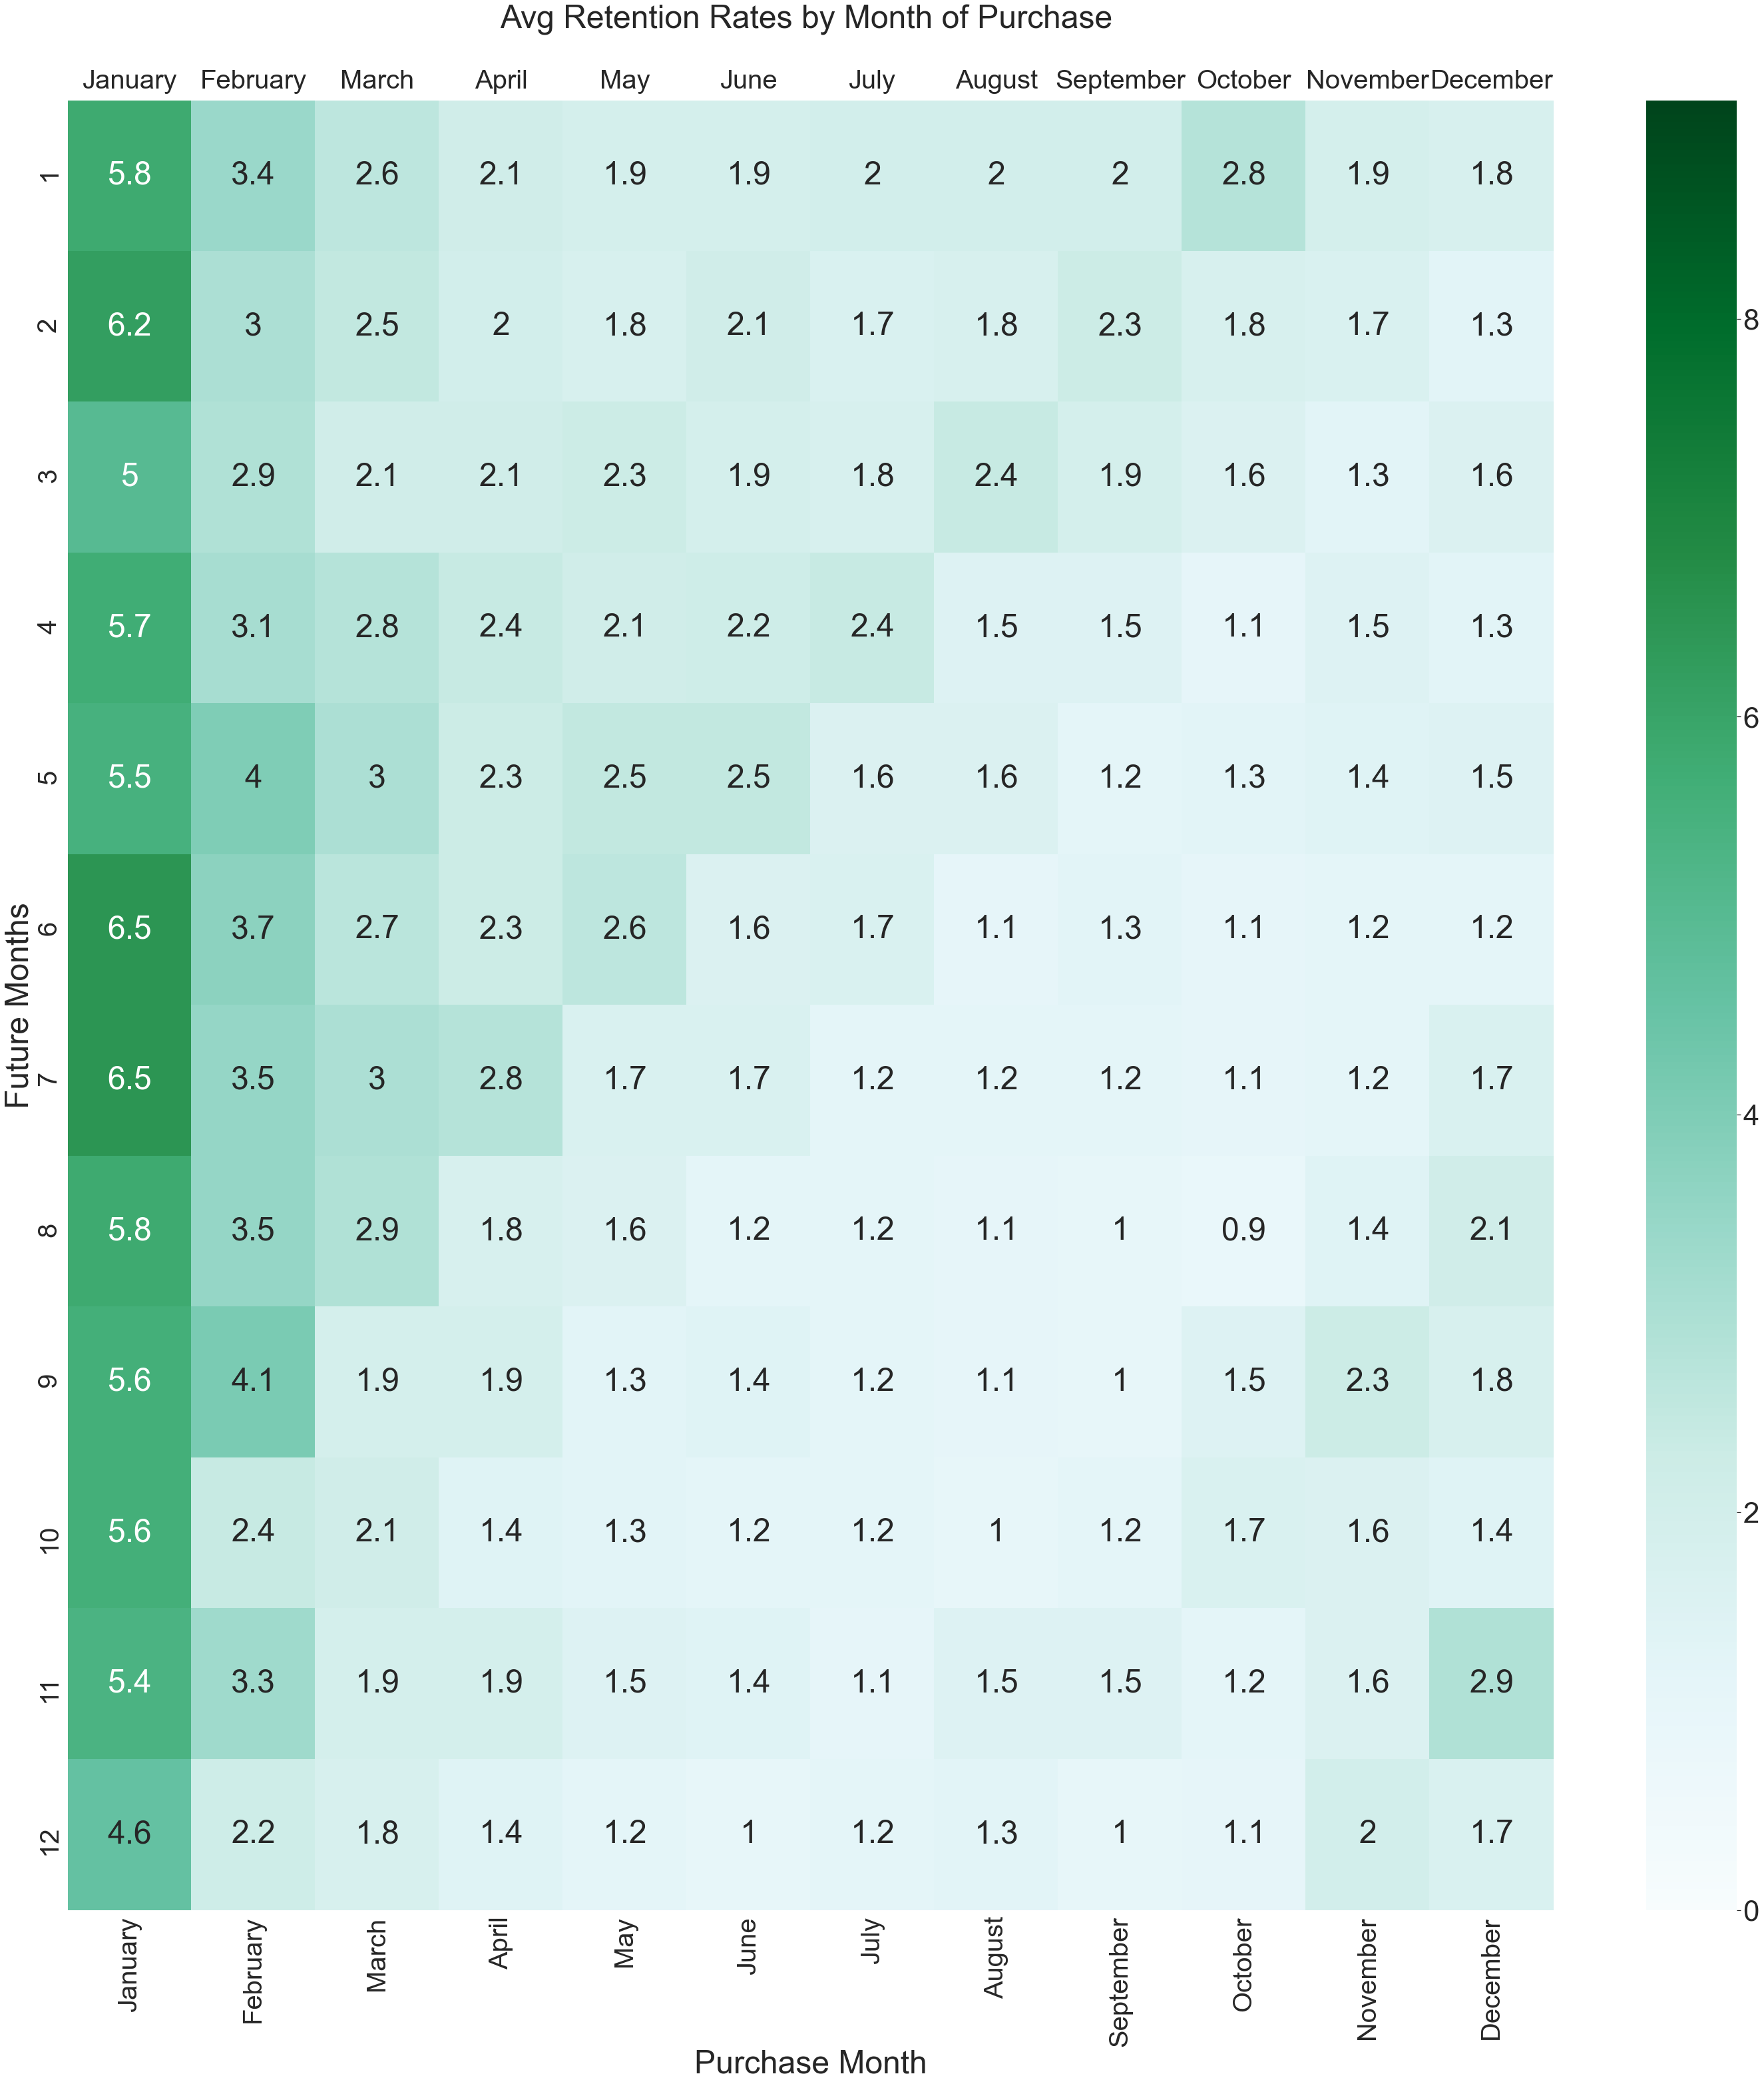

In [266]:
plt.figure(figsize=(50,50))

sns.set(font_scale=4)
plt.title('Avg Retention Rates by Month of Purchase \n')
#plt.ylabel('Months in \n')

ax = sns.heatmap(retention_month_avg,
            annot=True,
            vmin=0.0, vmax=retention.iloc[:,1:].max().sort_values(ascending=False).values[0],
            #fmt='00',
            cmap='BuGn')
#ax.set_yticklabels(retention.index.strftime('%m-%Y'))
ax.tick_params(axis='both', which='major', labelsize=40, labelbottom=True, bottom=False, top=False, labeltop=True)

fig = ax.get_figure()
#fig.savefig("Avg_Retention_byMonth.png") 

#### Retention Chart

In [49]:
retention.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

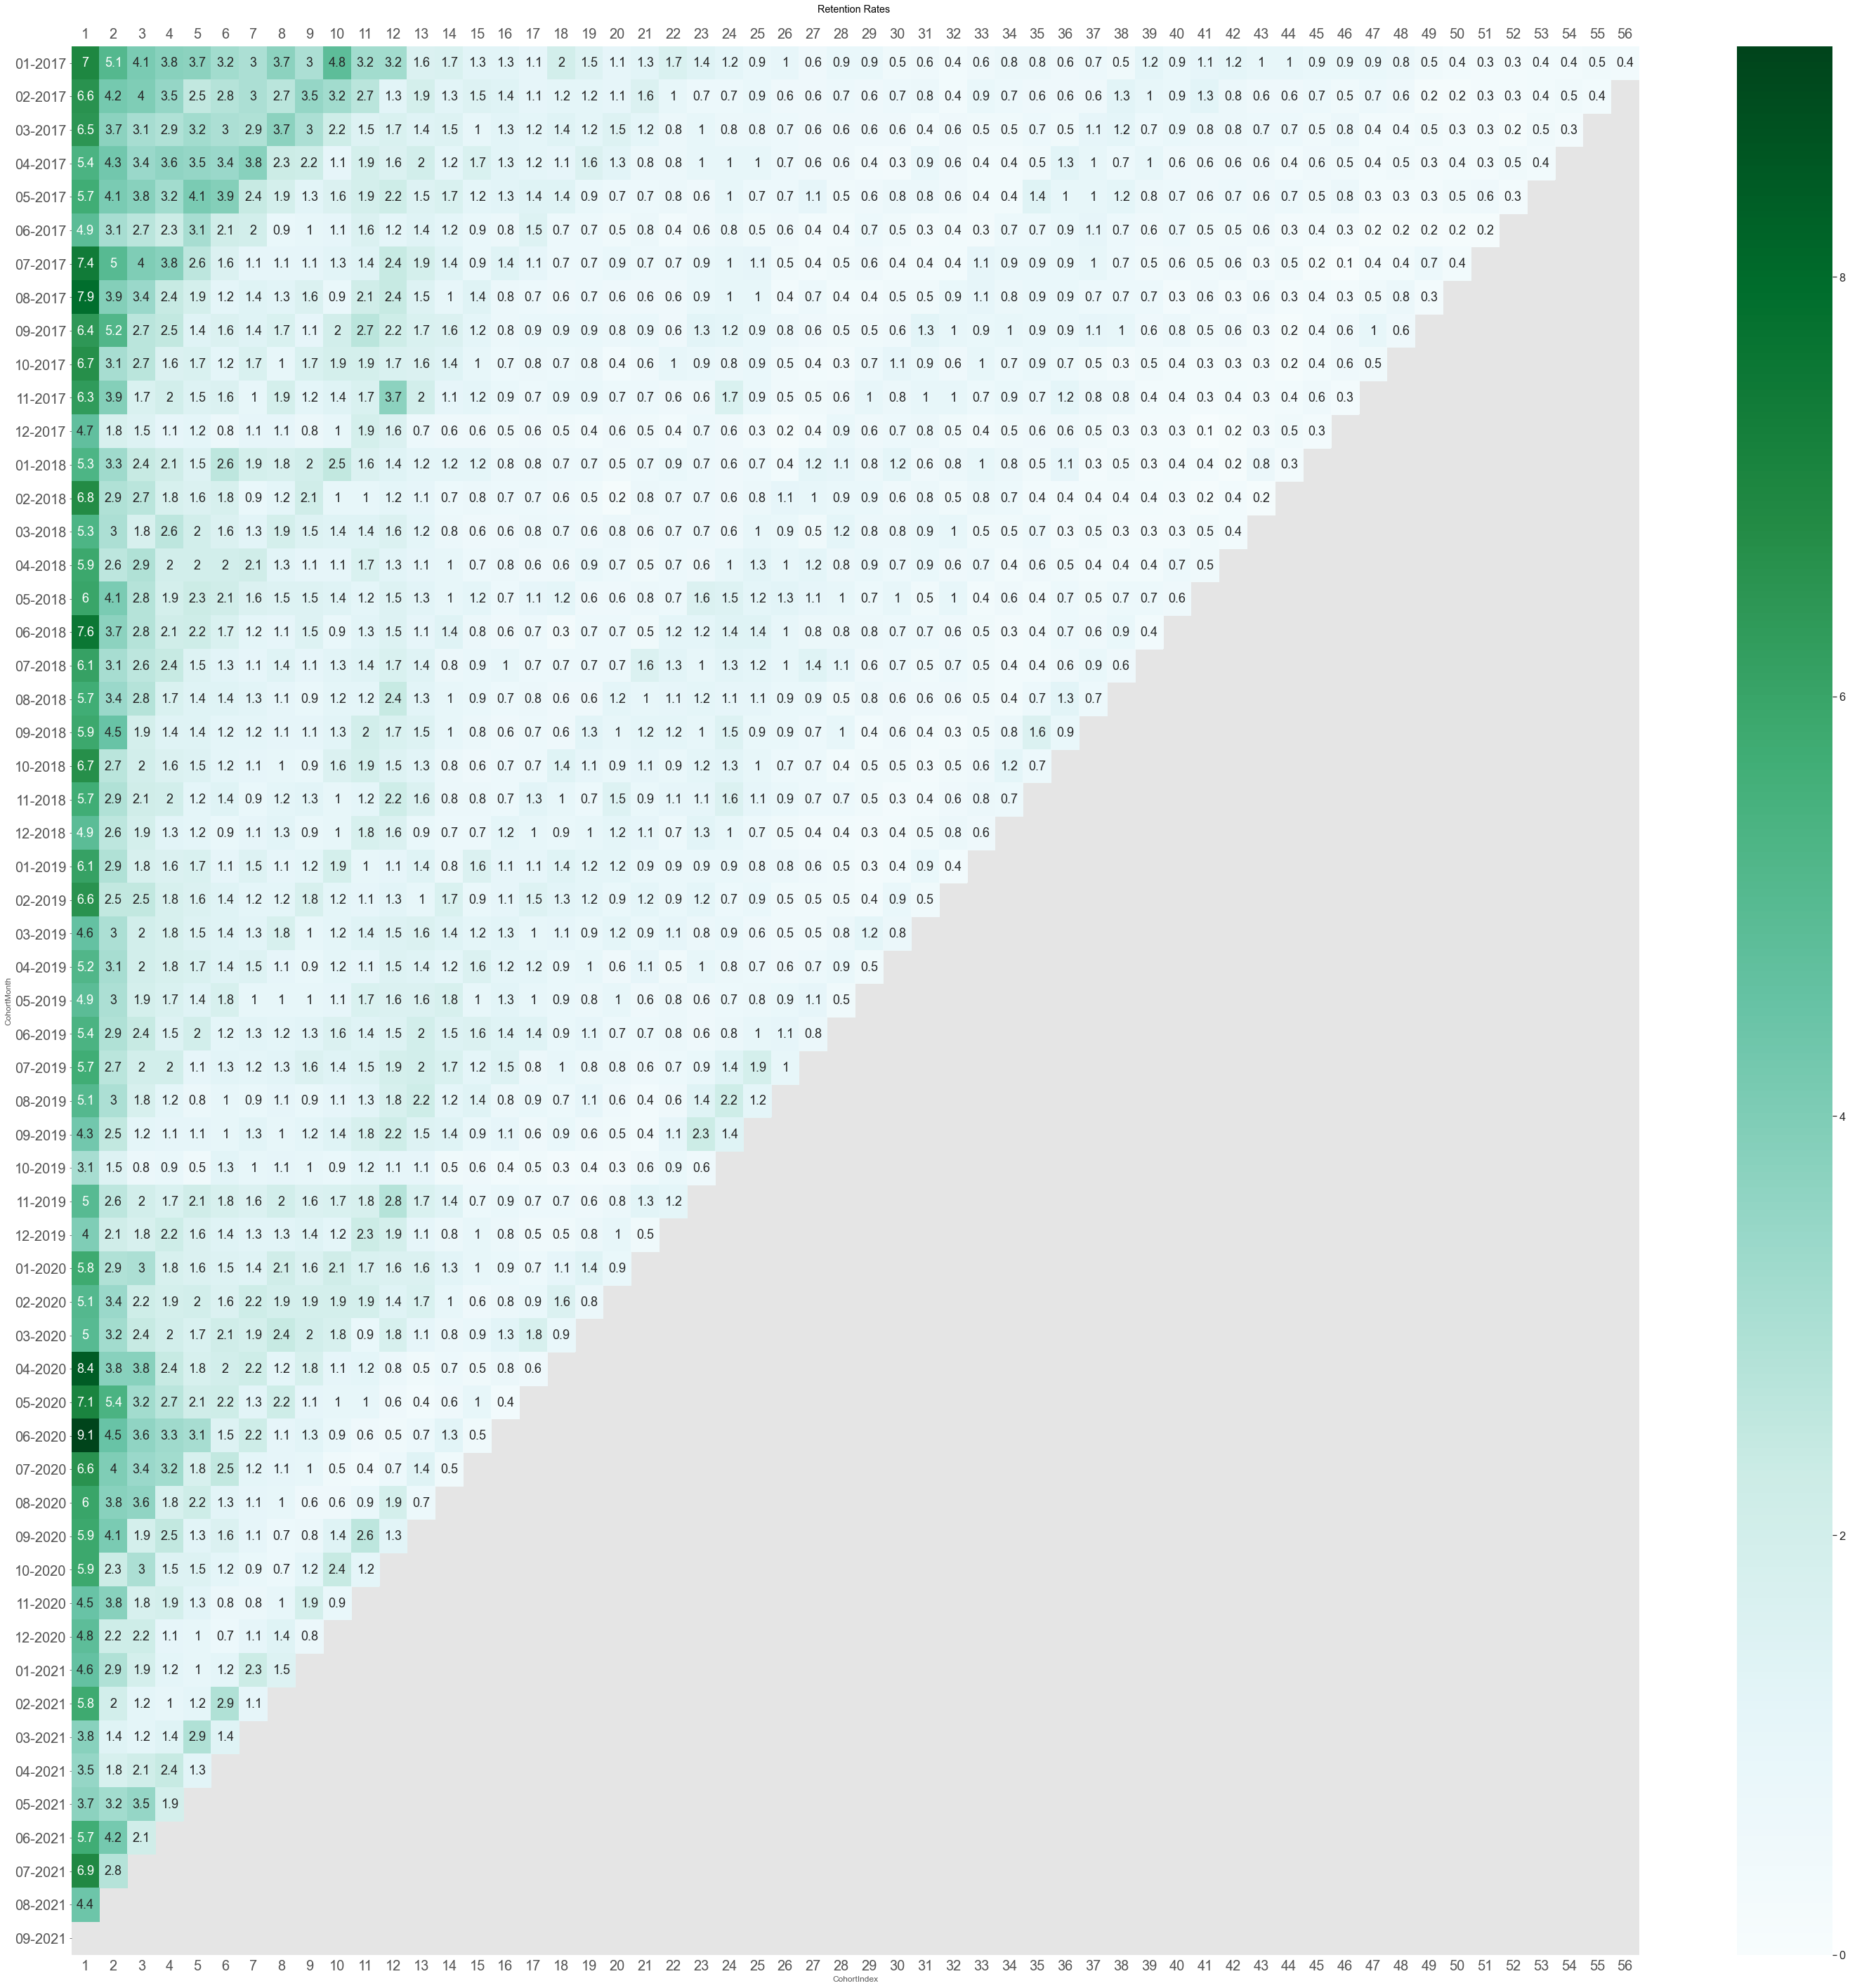

In [50]:
plt.figure(figsize=(50,50))

plt.title('Retention Rates \n')
plt.ylabel('CohortMonth \n')

sns.set(font_scale=1.5)
ax = sns.heatmap(retention.iloc[:,1:].round(1),
            annot=True,
            vmin=0.0, vmax=retention.iloc[:,1:].max().sort_values(ascending=False).values[0],
            #fmt='00',
            cmap='BuGn')
ax.set_yticklabels(retention.index.strftime('%m-%Y'))
ax.tick_params(axis='both', which='major', labelsize=20, labelbottom=True, bottom=False, top=False, labeltop=True)

fig = ax.get_figure()
fig.savefig("Retention_Rates.png") 

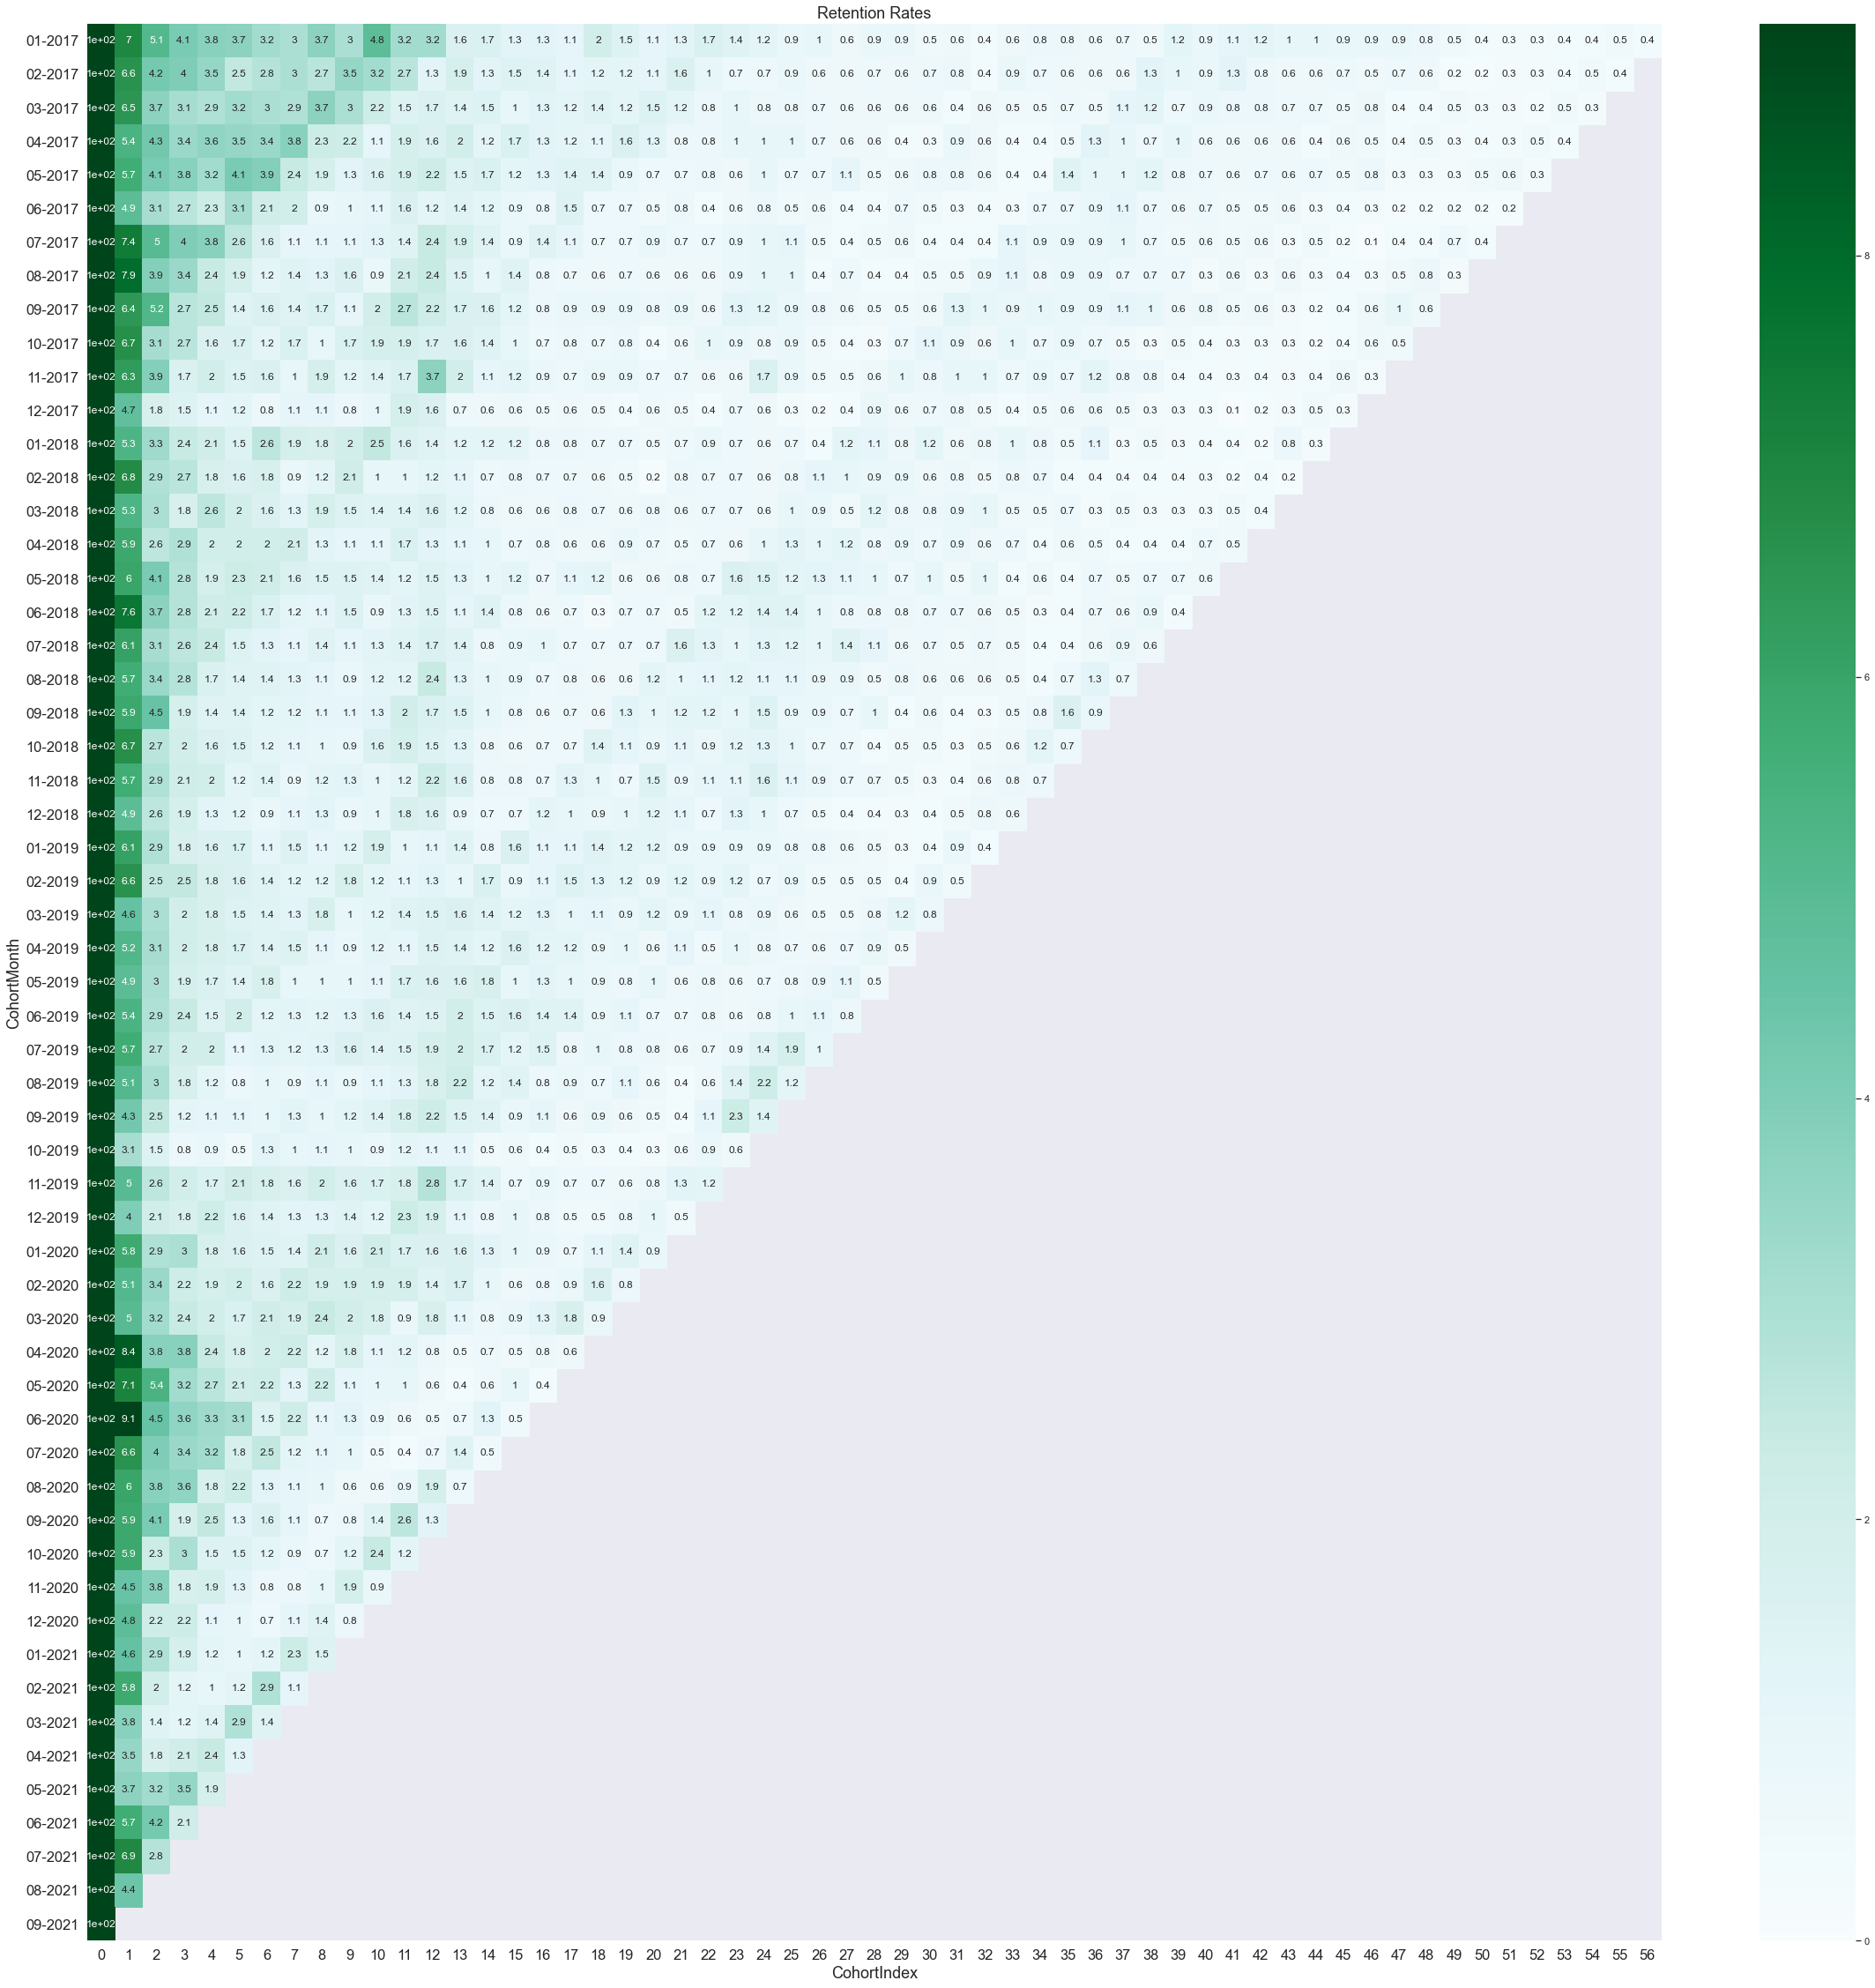

In [51]:
plt.figure(figsize=(40,40))
plt.title('Retention Rates')
plt.ylabel('CohortMonth')

sns.set()
ax = sns.heatmap(retention.round(1),
            annot=True,
            vmin=0.0, vmax=retention.iloc[:,1:].max().sort_values(ascending=False).values[0],
            #fmt='00',
            cmap='BuGn')
ax.set_yticklabels(retention.index.strftime('%m-%Y'))
plt.show()

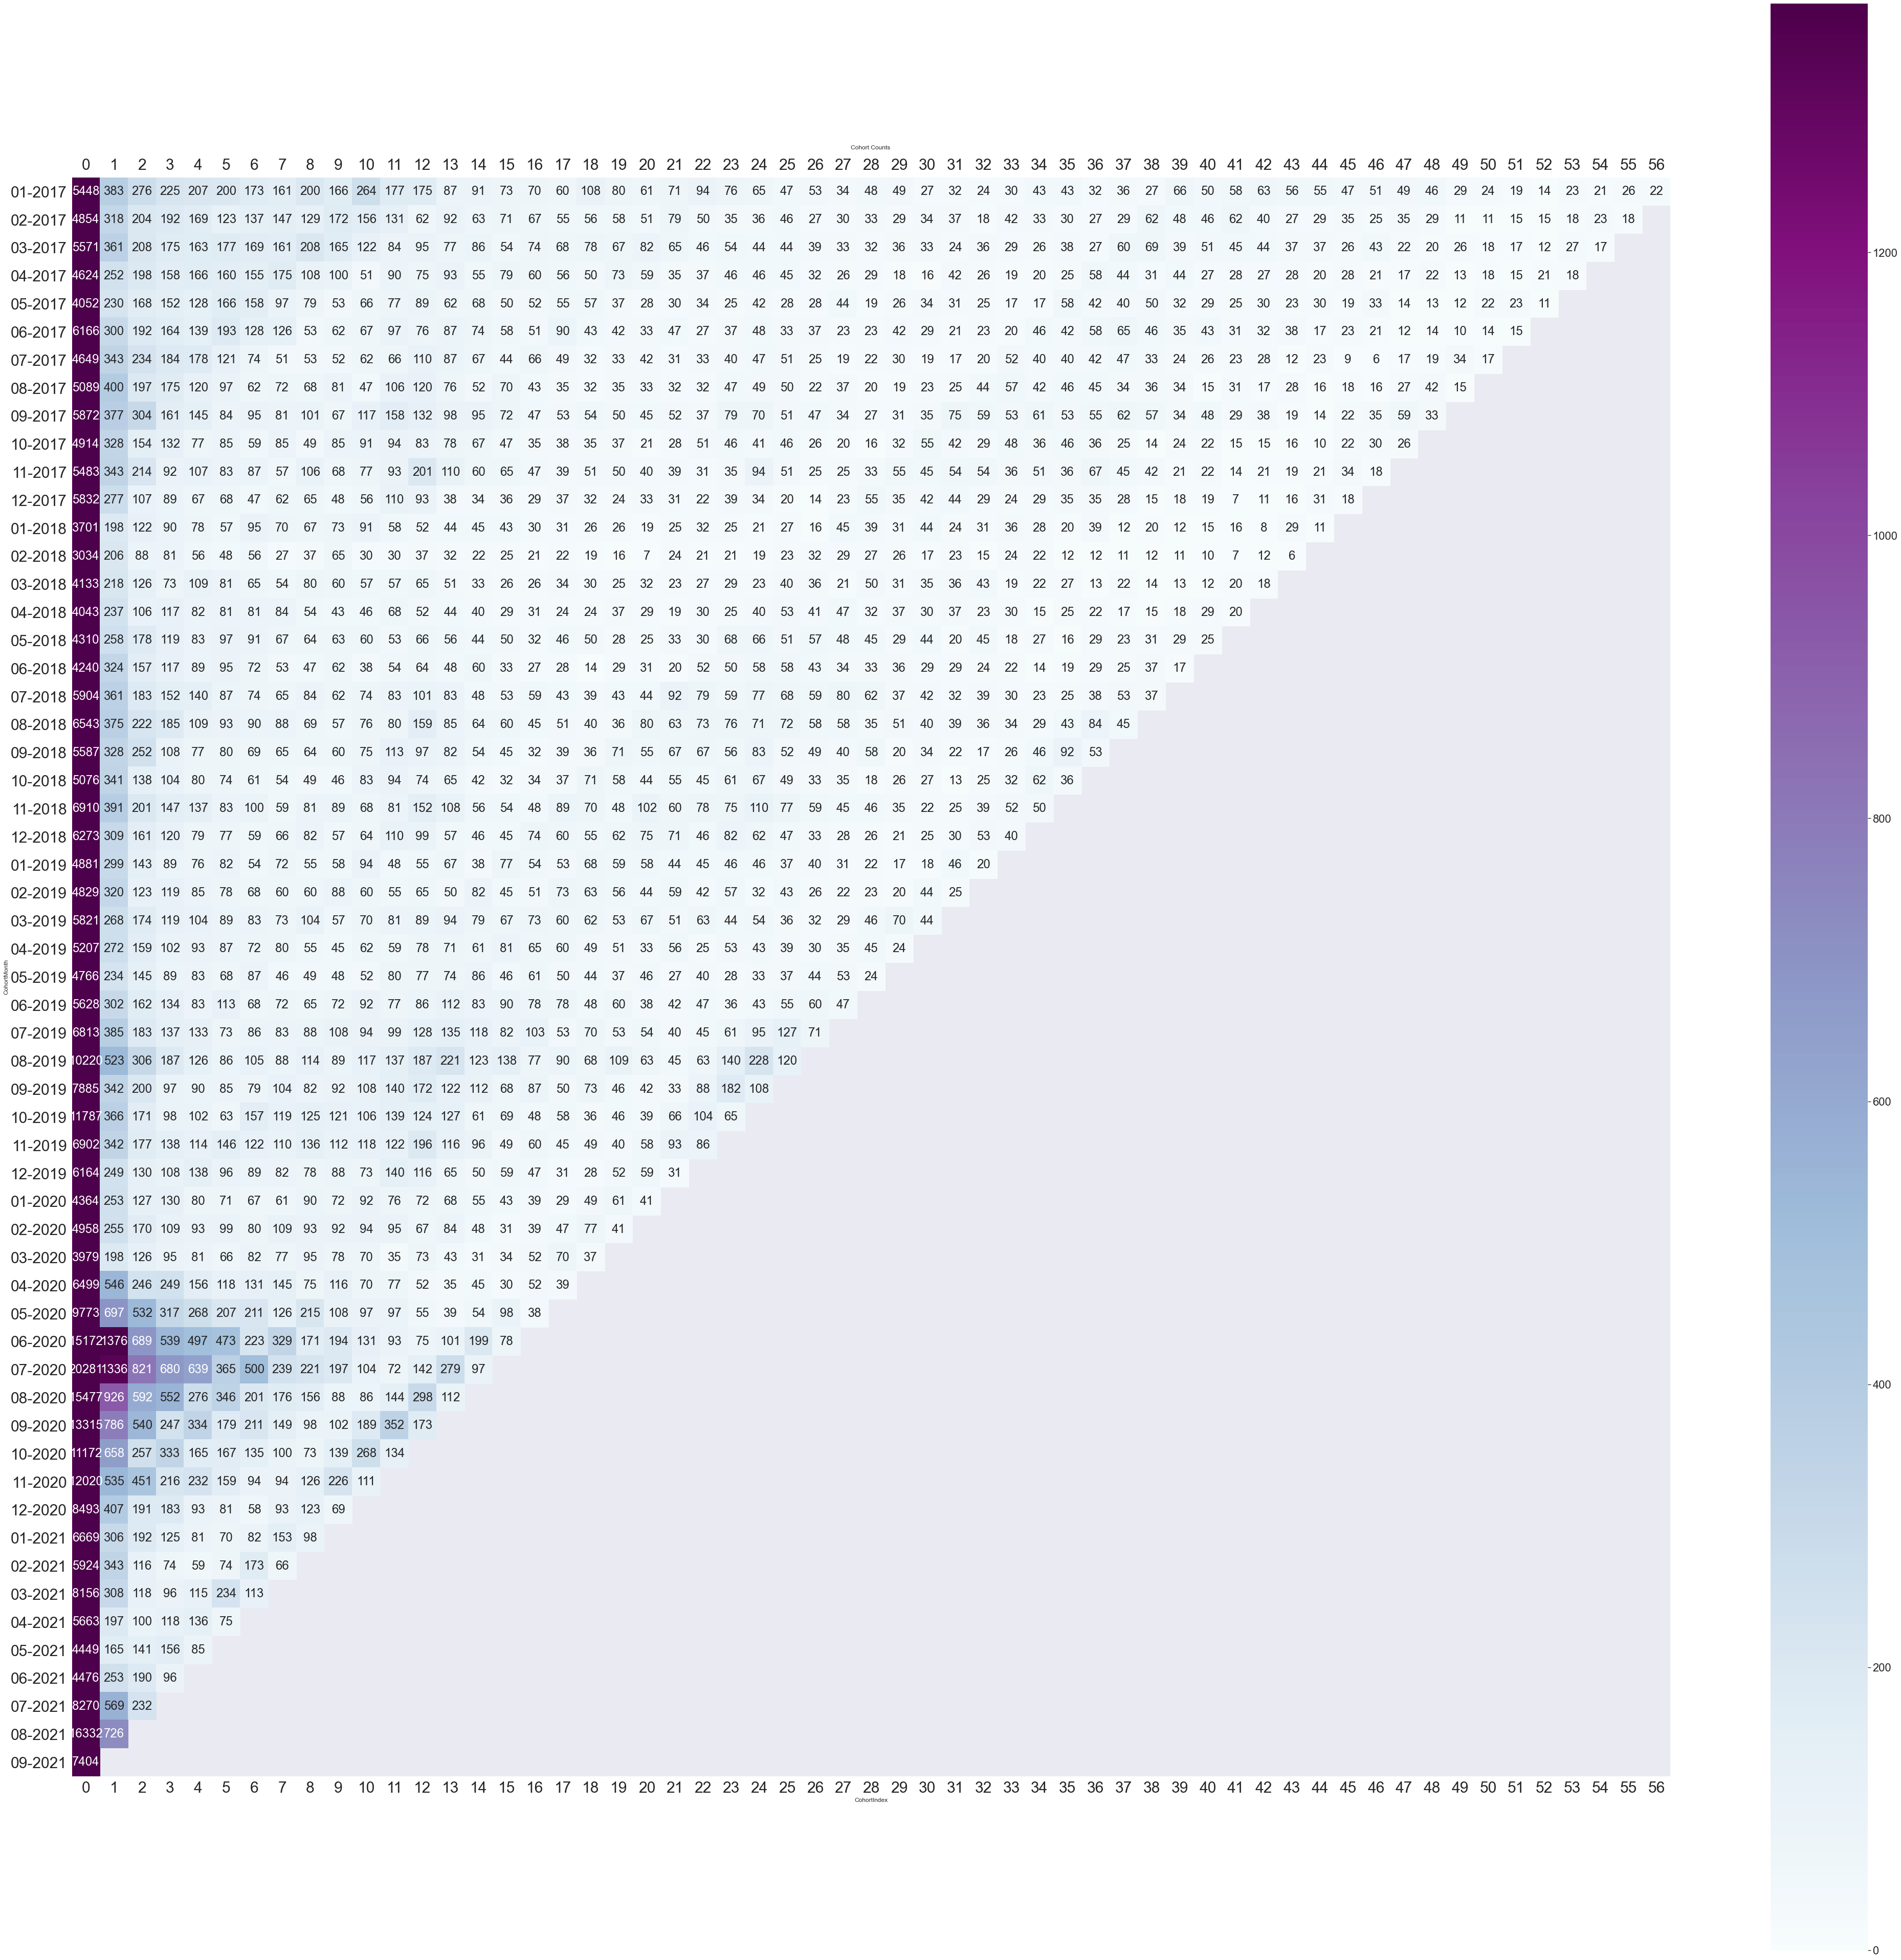

In [52]:
plt.figure(figsize=(70,70))

plt.title('Cohort Counts \n')
plt.ylabel('CohortMonth \n')

sns.set(font_scale=2)
ax =sns.heatmap(cohort_counts.round(0),annot=True,square=True,fmt='g',cmap='BuPu',
                vmin=0.0, vmax=cohort_counts.iloc[:,1:].max().sort_values(ascending=False).values[0]
               )

ax.set_yticklabels(cohort_counts.index.strftime('%m-%Y'))
ax.tick_params(axis='both', which='major', labelsize=30, labelbottom=True, bottom=False, top=False, labeltop=True)

fig = ax.get_figure()
fig.savefig("Cohort_Counts.png") 

## RFM

In [53]:
sales.head(2)

month customer_name  customer_id billing_country billing_postal_code  \
0 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   
1 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   

  billing_region  product_price                    product_title product_type  \
0       Maryland           10.0    USA gray and black soft socks        Socks   
1       Maryland           10.0  American Predator printed socks        Socks   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0     Returning     1.0        2.5          2.5           0.0   
1     Returning     1.0        2.5          2.5           0.0   

   ordered_item_quantity  average_order_value CohortMonth  CohortIndex  
0                      1                  2.5  2017-01-01            0  
1                      1                  2.5  2017-01-01            0

In [54]:
sales.groupby('customer_id')[['net_sales']].sum()

net_sales
customer_id             
0               11528.17
270354897          15.00
278902437           1.40
278971193          65.00
279089689          20.00
...                  ...
5193320562781      12.98
5193320792157      30.98
5193321414749      30.00
5193321775197      24.98
5193322987613      13.59

[396057 rows x 1 columns]

In [55]:
sales.groupby('customer_id')[['month']].max()

month
customer_id             
0             2020-02-01
270354897     2021-07-01
278902437     2017-04-01
278971193     2017-01-01
279089689     2018-05-01
...                  ...
5193320562781 2021-09-01
5193320792157 2021-09-01
5193321414749 2021-09-01
5193321775197 2021-09-01
5193322987613 2021-09-01

[396057 rows x 1 columns]

In [36]:
max_date = max(sales.month) + dt.timedelta(days=1)

In [57]:
max_date

Timestamp('2021-09-02 00:00:00')

In [37]:
# Latest Transaction date made by each customer
RFM = sales.groupby('customer_id')[['month']].max()

#### Recency

In [38]:
# Recency: days since last* purchase | * remember RFM uses max()
RFM['Recency'] = (max_date - RFM.month).dt.days

display(RFM.head())
display(RFM.tail())

""" [month] here presents last date of last purchase by each customer """

""" Recency shows how many days have passed since today (ie max_date = Sep/2/2021) and last transaction """

month  Recency
customer_id                    
0           2020-02-01      579
270354897   2021-07-01       63
278902437   2017-04-01     1615
278971193   2017-01-01     1705
279089689   2018-05-01     1220

month  Recency
customer_id                      
5193320562781 2021-09-01        1
5193320792157 2021-09-01        1
5193321414749 2021-09-01        1
5193321775197 2021-09-01        1
5193322987613 2021-09-01        1

' Recency shows how many days have passed since today (ie max_date = Sep/2/2021) and last transaction '

In [60]:
max_date - RFM.month

customer_id
0                579 days
270354897         63 days
278902437       1615 days
278971193       1705 days
279089689       1220 days
                   ...   
5193320562781      1 days
5193320792157      1 days
5193321414749      1 days
5193321775197      1 days
5193322987613      1 days
Name: month, Length: 396057, dtype: timedelta64[ns]

#### Frequency

In [39]:
RFM['Frequency'] = sales.groupby('customer_id')[['month']].count()

display(RFM.head())
display(RFM.tail())

""" how many different times (i.e. months) each has client purchased """

month  Recency  Frequency
customer_id                               
0           2020-02-01      579        675
270354897   2021-07-01       63          1
278902437   2017-04-01     1615          1
278971193   2017-01-01     1705          7
279089689   2018-05-01     1220          1

month  Recency  Frequency
customer_id                                 
5193320562781 2021-09-01        1          2
5193320792157 2021-09-01        1          3
5193321414749 2021-09-01        1          2
5193321775197 2021-09-01        1          3
5193322987613 2021-09-01        1          2

' how many different times (i.e. months) each has client purchased '

#### MonetaryValue

In [40]:
RFM['MonetaryValue'] = sales.groupby('customer_id')[['net_sales']].sum()

display(RFM.head())
display(RFM.tail())

""" total amount of net_sales by each client """

month  Recency  Frequency  MonetaryValue
customer_id                                              
0           2020-02-01      579        675       11528.17
270354897   2021-07-01       63          1          15.00
278902437   2017-04-01     1615          1           1.40
278971193   2017-01-01     1705          7          65.00
279089689   2018-05-01     1220          1          20.00

month  Recency  Frequency  MonetaryValue
customer_id                                                
5193320562781 2021-09-01        1          2          12.98
5193320792157 2021-09-01        1          3          30.98
5193321414749 2021-09-01        1          2          30.00
5193321775197 2021-09-01        1          3          24.98
5193322987613 2021-09-01        1          2          13.59

' total amount of net_sales by each client '

#### Tenure

In [41]:
sales.head(2)

month customer_name  customer_id billing_country billing_postal_code  \
0 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   
1 2017-01-01  Jessica Hite   1744218817   United States          21740-7021   

  billing_region  product_price                    product_title product_type  \
0       Maryland           10.0    USA gray and black soft socks        Socks   
1       Maryland           10.0  American Predator printed socks        Socks   

  customer_type  orders  net_sales  total_sales  gross_profit  \
0     Returning     1.0        2.5          2.5           0.0   
1     Returning     1.0        2.5          2.5           0.0   

   ordered_item_quantity  average_order_value CohortMonth  CohortIndex  
0                      1                  2.5  2017-01-01            0  
1                      1                  2.5  2017-01-01            0

In [42]:
#tenure = 
sales.groupby('customer_id')[['month']].max() - sales.groupby('customer_id')[['month']].min()

month
customer_id            
0             1126 days
270354897        0 days
278902437        0 days
278971193        0 days
279089689        0 days
...                 ...
5193320562781    0 days
5193320792157    0 days
5193321414749    0 days
5193321775197    0 days
5193322987613    0 days

[396057 rows x 1 columns]

In [43]:
tenure = sales.groupby('customer_id')[['month']].max() - sales.groupby('customer_id')[['month']].min()

In [44]:
RFM['Tenure'] = tenure.month.dt.days
RFM.head()

month  Recency  Frequency  MonetaryValue  Tenure
customer_id                                                      
0           2020-02-01      579        675       11528.17    1126
270354897   2021-07-01       63          1          15.00       0
278902437   2017-04-01     1615          1           1.40       0
278971193   2017-01-01     1705          7          65.00       0
279089689   2018-05-01     1220          1          20.00       0

#### Quantiles

In [45]:
# Recency Quartile
RFM['R'] = pd.qcut(RFM.Recency, q=4, labels=range(4,0,-1) ) # labels descending since bigger Retency is worse

display(RFM.head(3))
display(RFM.tail(3))

month  Recency  Frequency  MonetaryValue  Tenure  R
customer_id                                                         
0           2020-02-01      579        675       11528.17    1126  2
270354897   2021-07-01       63          1          15.00       0  4
278902437   2017-04-01     1615          1           1.40       0  1

month  Recency  Frequency  MonetaryValue  Tenure  R
customer_id                                                           
5193321414749 2021-09-01        1          2          30.00       0  4
5193321775197 2021-09-01        1          3          24.98       0  4
5193322987613 2021-09-01        1          2          13.59       0  4

In [46]:
# Frequency Quartile
RFM['F'] = pd.qcut(RFM.Frequency, q=4, labels=range(1,4),duplicates='drop') # only three quantiles (error if 4)

display(RFM.head())
display(RFM.tail())

month  Recency  Frequency  MonetaryValue  Tenure  R  F
customer_id                                                            
0           2020-02-01      579        675       11528.17    1126  2  3
270354897   2021-07-01       63          1          15.00       0  4  1
278902437   2017-04-01     1615          1           1.40       0  1  1
278971193   2017-01-01     1705          7          65.00       0  1  3
279089689   2018-05-01     1220          1          20.00       0  1  1

month  Recency  Frequency  MonetaryValue  Tenure  R  F
customer_id                                                              
5193320562781 2021-09-01        1          2          12.98       0  4  1
5193320792157 2021-09-01        1          3          30.98       0  4  2
5193321414749 2021-09-01        1          2          30.00       0  4  1
5193321775197 2021-09-01        1          3          24.98       0  4  2
5193322987613 2021-09-01        1          2          13.59       0  4  1

In [47]:
# MonetaryValue Quartile
RFM['M'] = pd.qcut(RFM.MonetaryValue, q=4, labels=range(1,5) )

display(RFM.head())
display(RFM.tail())

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M
customer_id                                                               
0           2020-02-01      579        675       11528.17    1126  2  3  4
270354897   2021-07-01       63          1          15.00       0  4  1  1
278902437   2017-04-01     1615          1           1.40       0  1  1  1
278971193   2017-01-01     1705          7          65.00       0  1  3  4
279089689   2018-05-01     1220          1          20.00       0  1  1  2

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M
customer_id                                                                 
5193320562781 2021-09-01        1          2          12.98       0  4  1  1
5193320792157 2021-09-01        1          3          30.98       0  4  2  3
5193321414749 2021-09-01        1          2          30.00       0  4  1  3
5193321775197 2021-09-01        1          3          24.98       0  4  2  2
5193322987613 2021-09-01        1          2          13.59       0  4  1  1

In [71]:
# Tenure Quartile
RFM['T'] = pd.qcut(RFM.Tenure, q=6, labels=range(1,3),duplicates='drop' )

display(RFM.head())
display(RFM.tail())

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M  T  \
customer_id                                                                     
0           2020-02-01      579        675       11528.17    1126  2  3  4  2   
270354897   2021-07-01       63          1          15.00       0  4  1  1  1   
278902437   2017-04-01     1615          1           1.40       0  1  1  1  1   
278971193   2017-01-01     1705          7          65.00       0  1  3  4  1   
279089689   2018-05-01     1220          1          20.00       0  1  1  2  1   

            RFM_Segment  RFM_Score  
customer_id                         
0                  2341       10.0  
270354897          4111        7.0  
278902437          1111        4.0  
278971193          1341        9.0  
279089689          1121        5.0

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M  \
customer_id                                                                    
5193320562781 2021-09-01        1          2          12.98       0  4  1  1   
5193320792157 2021-09-01        1          3          30.98       0  4  2  3   
5193321414749 2021-09-01        1          2          30.00       0  4  1  3   
5193321775197 2021-09-01        1          3          24.98       0  4  2  2   
5193322987613 2021-09-01        1          2          13.59       0  4  1  1   

               T RFM_Segment  RFM_Score  
customer_id                              
5193320562781  1        4111        7.0  
5193320792157  1        4231       10.0  
5193321414749  1        4131        9.0  
5193321775197  1        4221        9.0  
5193322987613  1        4111        7.0

#### Segment

In [62]:
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M']) + str(x['T']) 

In [72]:
RFM['RFM_Segment'] = RFM.apply(join_rfm, axis=1)
RFM.head(3)

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M  T  \
customer_id                                                                     
0           2020-02-01      579        675       11528.17    1126  2  3  4  2   
270354897   2021-07-01       63          1          15.00       0  4  1  1  1   
278902437   2017-04-01     1615          1           1.40       0  1  1  1  1   

            RFM_Segment  RFM_Score  
customer_id                         
0                  2342       10.0  
270354897          4111        7.0  
278902437          1111        4.0

In [73]:
RFM['RFM_Score'] = RFM[['R','F','M','T']].sum(axis=1)
RFM.head(3)

month  Recency  Frequency  MonetaryValue  Tenure  R  F  M  T  \
customer_id                                                                     
0           2020-02-01      579        675       11528.17    1126  2  3  4  2   
270354897   2021-07-01       63          1          15.00       0  4  1  1  1   
278902437   2017-04-01     1615          1           1.40       0  1  1  1  1   

            RFM_Segment  RFM_Score  
customer_id                         
0                  2342       11.0  
270354897          4111        7.0  
278902437          1111        4.0

In [65]:
# Counting RFM segments from most frequent to less
pd.DataFrame(RFM.groupby('RFM_Segment').size().sort_values(ascending=False),
             columns={'Count'}).head(10)

Count
RFM_Segment       
1111         28542
4111         23867
3131         23586
4341         23245
2111         22857
2121         19279
3121         17848
3111         16477
1121         14914
4121         14779

In [74]:
RFM_Segment_count = pd.DataFrame( RFM.groupby('RFM_Segment').size().sort_index(),columns={'Count'} )
RFM_Segment_count.head(6)

Count
RFM_Segment       
1111         28394
1112           148
1121         14637
1122           277
1131          7808
1132           248

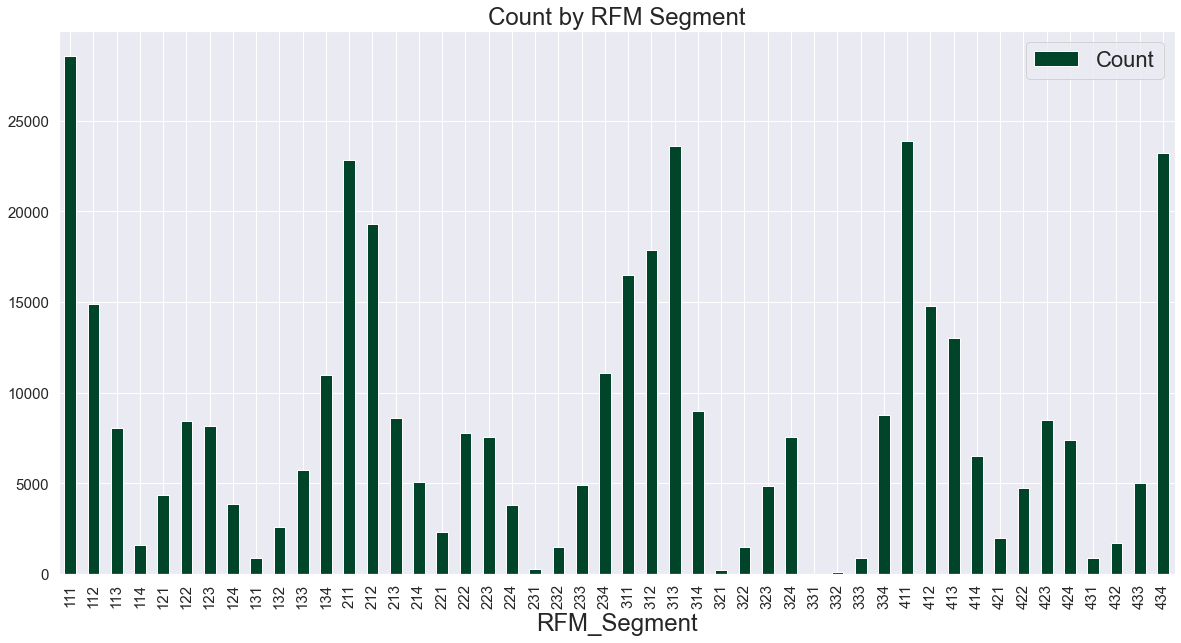

In [71]:
# Counting RFM segments from most frequent to less
RFM_Segment_count.plot(kind='bar',figsize=(20,10),fontsize=15,title='Count by RFM Segment',cmap='YlGn_r');
plt.show()

#### Score Metrics

In [75]:
RFM.groupby('RFM_Score').agg({'Recency':'mean',
                              'Frequency': 'mean',
                              'MonetaryValue': ['mean','count'],
                              'Tenure': 'mean'}
                            ).round(1)

Recency Frequency MonetaryValue        Tenure
             mean      mean          mean  count   mean
RFM_Score                                              
4.0        1357.6       1.3           8.8  28394    0.1
5.0        1038.1       1.6          13.9  41687    0.9
6.0         846.4       1.8          20.2  54747    2.9
7.0         577.1       1.9          22.8  69473    5.2
8.0         550.8       2.3          37.3  62726   13.4
9.0         532.5       3.5          55.7  46574   36.5
10.0        499.3       5.3          74.7  34816  103.0
11.0        388.4       6.9          91.9  22357  234.4
12.0        242.2       8.3         113.1  17822  330.8
13.0        141.0      13.4         165.6  17461  570.5

#### Segment Labeling

### K-Means (pre-processing)

In [73]:
RFM[['Recency','Frequency','MonetaryValue']].describe()

Recency      Frequency  MonetaryValue
count  396057.000000  396057.000000  396057.000000
mean      657.586365       3.439439      45.494810
std       476.190861       5.106423     102.486089
min         1.000000       1.000000       0.250000
25%       305.000000       1.000000      15.000000
50%       519.000000       2.000000      27.750000
75%      1006.000000       4.000000      50.400000
max      1705.000000     675.000000   16500.000000

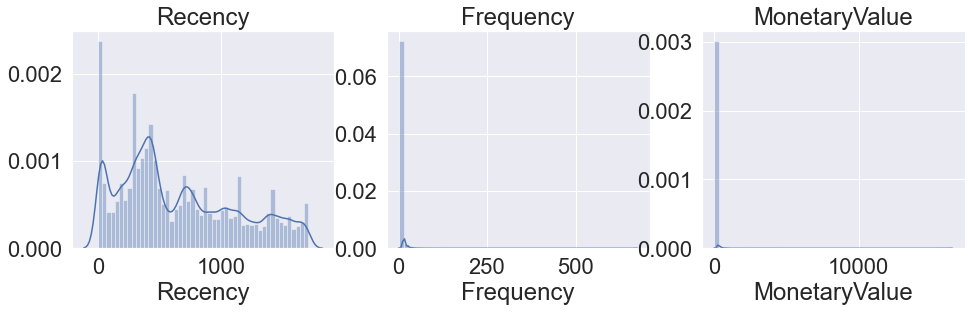

In [74]:
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.distplot(RFM.Recency)
plt.title('Recency')

plt.subplot(132)
sns.distplot(RFM.Frequency)
plt.title('Frequency')

plt.subplot(133)
sns.distplot(RFM.MonetaryValue)
plt.title('MonetaryValue')

plt.show()

### Box-Cox for Assymetric Fix

In [75]:
def boxcox_df(df):
    x_boxcox, _ = stats.boxcox(df)
    return x_boxcox

In [76]:
RFM_boxcox = RFM[['Recency','Frequency','MonetaryValue']].apply(boxcox_df,axis=0)
RFM_boxcox.head()

Recency  Frequency  MonetaryValue
customer_id                                     
0            44.174970   1.948661       7.837178
270354897    13.524767   0.000000       2.570003
278902437    74.407568   0.000000       0.334275
278971193    76.469001   1.251815       3.852423
279089689    64.578691   0.000000       2.827416

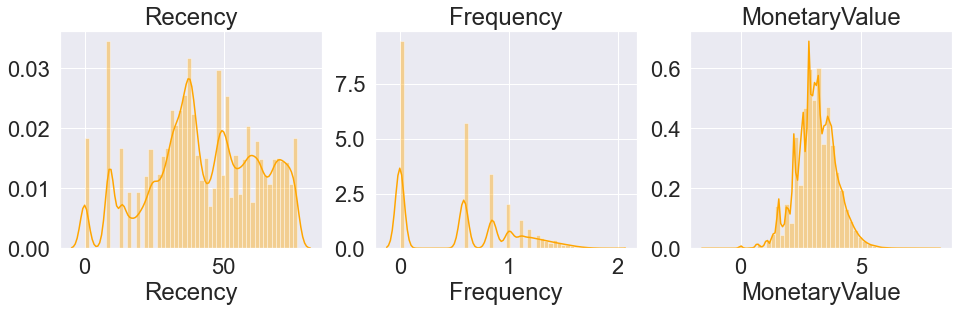

In [77]:
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.distplot(RFM_boxcox.Recency,color='orange')
plt.title('Recency')

plt.subplot(132)
sns.distplot(RFM_boxcox.Frequency,color='orange')
plt.title('Frequency')

plt.subplot(133)
sns.distplot(RFM_boxcox.MonetaryValue,color='orange')
plt.title('MonetaryValue')

plt.show()

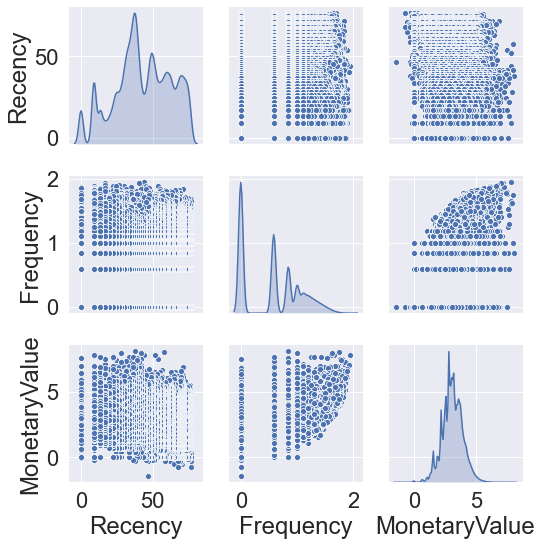

In [78]:
sns.pairplot(RFM_boxcox,diag_kind='kde',palette='seagreen')
plt.show()

In [79]:
RFM_boxcox.describe()

Recency      Frequency  MonetaryValue
count  396057.000000  396057.000000  396057.000000
mean       43.029629       0.577260       3.120722
std        19.394638       0.502458       0.810963
min         0.000000       0.000000      -1.424439
25%        31.704173       0.000000       2.570003
50%        41.759748       0.587239       3.116968
75%        58.563591       1.004667       3.635158
max        76.469001       1.948661       8.084460

### Scaling for Mean and StDv Normalization (manually and via StandardScaler)

In [80]:
RFM_boxcox_scaled_manual = (RFM_boxcox - RFM_boxcox.mean())/RFM_boxcox.std()

display(RFM_boxcox_scaled_manual.head(3))
RFM_boxcox_scaled_manual.describe().round(1)

Recency  Frequency  MonetaryValue
customer_id                                    
0            0.059055   2.729385       5.815875
270354897   -1.521290  -1.148873      -0.679093
278902437    1.617867  -1.148873      -3.435975

Recency  Frequency  MonetaryValue
count  396057.0   396057.0       396057.0
mean        0.0        0.0           -0.0
std         1.0        1.0            1.0
min        -2.2       -1.1           -5.6
25%        -0.6       -1.1           -0.7
50%        -0.1        0.0           -0.0
75%         0.8        0.9            0.6
max         1.7        2.7            6.1

In [81]:
scaler = StandardScaler()
scaler.fit(RFM_boxcox)
RFM_boxcox_scaled = scaler.transform(RFM_boxcox)

In [82]:
RFM_normalized = pd.DataFrame(data=RFM_boxcox_scaled,
                              index=RFM_boxcox.index,
                              columns=RFM_boxcox.columns)
RFM_normalized.head(3)

Recency  Frequency  MonetaryValue
customer_id                                    
0            0.059055   2.729388       5.815883
270354897   -1.521292  -1.148875      -0.679094
278902437    1.617869  -1.148875      -3.435979

In [83]:
RFM_normalized.describe().round(1)

Recency  Frequency  MonetaryValue
count  396057.0   396057.0       396057.0
mean       -0.0        0.0            0.0
std         1.0        1.0            1.0
min        -2.2       -1.1           -5.6
25%        -0.6       -1.1           -0.7
50%        -0.1        0.0           -0.0
75%         0.8        0.9            0.6
max         1.7        2.7            6.1

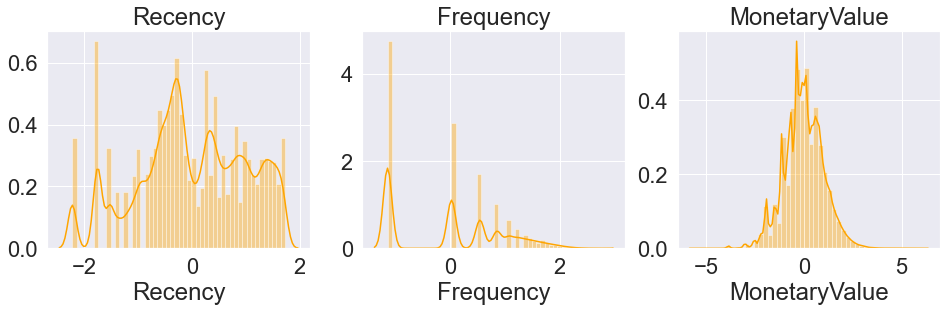

In [84]:
plt.figure(figsize=(16,4))

plt.subplot(131)
sns.distplot(RFM_normalized.Recency,color='orange')
plt.title('Recency')

plt.subplot(132)
sns.distplot(RFM_normalized.Frequency,color='orange')
plt.title('Frequency')

plt.subplot(133)
sns.distplot(RFM_normalized.MonetaryValue,color='orange')
plt.title('MonetaryValue')

plt.show()

## K-Means

In [85]:
# Fit KMeans and calculate SSE for each *k*
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(RFM_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

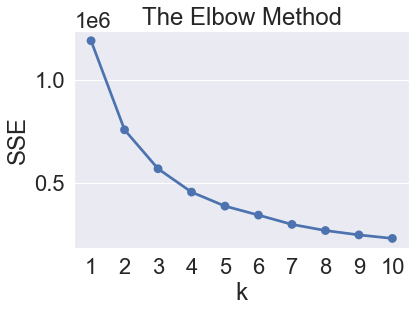

In [86]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [87]:
RFM_knn_3 = RFM.drop('month',axis=1).assign(Cluster = \
            KMeans(n_clusters=3, random_state=1).fit(RFM_normalized).labels_)

""" a KNN fit was applied to find clusters around Retency, Frequency and MonetaryValue in the normalized df """

' a KNN fit was applied to find clusters around Retency, Frequency and MonetaryValue in the normalized df '

In [88]:
RFM_knn_3.head(3)

Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  \
customer_id                                                           
0                579        675       11528.17  2  3  4         234   
270354897         63          1          15.00  4  1  1         411   
278902437       1615          1           1.40  1  1  1         111   

             RFM_Score  Cluster  
customer_id                      
0                  9.0        2  
270354897          6.0        0  
278902437          3.0        0

In [89]:
# checking if wach Cluster truly shows differences among Retency/Frequency/MV
RFM_knn_3_summary = RFM_knn_3.groupby(['Cluster']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count'],
                                                       }).round(0)

RFM_knn_3_summary

Recency Frequency MonetaryValue        
           mean      mean          mean   count
Cluster                                        
0         626.0       1.0          20.0  163840
1        1117.0       4.0          42.0  115157
2         249.0       6.0          85.0  117060

In [90]:
# adding cluster to RFM df
RFM['Cluster'] = RFM_knn_3['Cluster']

RFM.head(3)

month  Recency  Frequency  MonetaryValue  R  F  M  \
customer_id                                                          
0           2020-02-01      579        675       11528.17  2  3  4   
270354897   2021-07-01       63          1          15.00  4  1  1   
278902437   2017-04-01     1615          1           1.40  1  1  1   

            RFM_Segment  RFM_Score  Cluster  
customer_id                                  
0                   234        9.0        2  
270354897           411        6.0        0  
278902437           111        3.0        0

In [91]:
RFM.pivot_table(index='customer_id',columns='Cluster',values='Frequency')[2]

customer_id
0                675.0
270354897          NaN
278902437          NaN
278971193          NaN
279089689          NaN
                 ...  
5193320562781      2.0
5193320792157      3.0
5193321414749      2.0
5193321775197      3.0
5193322987613      2.0
Name: 2, Length: 396057, dtype: float64

C:\Users\Public\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[(-5.0, 1750.0)]

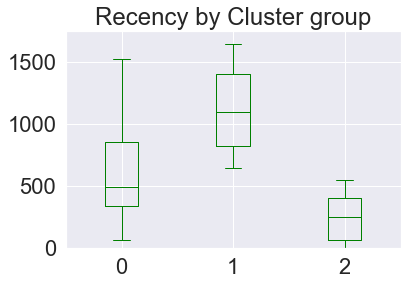

In [92]:
# Boxplot of Recency among different Clusters
ax = RFM.pivot_table(index='customer_id',columns='Cluster',values='Recency').\
                     boxplot(whis=(5,95),showfliers=False,color='green')
ax.set_title('Recency by Cluster group')
ax.set(ylim=(-5, 1750))

C:\Users\Public\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[(-1.0, 20.0)]

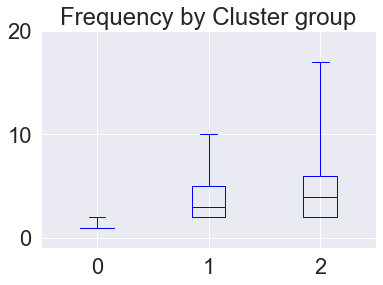

In [93]:
# Boxplot of Frequency among different Clusters
ax = RFM.pivot_table(index='customer_id',columns='Cluster',values='Frequency').\
                     boxplot(whis=(5,95),showfliers=False,color='blue')
ax.set_title('Frequency by Cluster group')
ax.set(ylim=(-1, 20))

C:\Users\Public\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[(0.0, 250.0)]

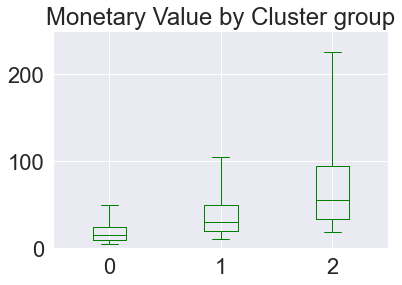

In [94]:
# Boxplot of Monetary Value among different Clusters
ax=RFM.pivot_table(index='customer_id',columns='Cluster',values='MonetaryValue').\
                    boxplot(whis=(5,95),showfliers=False,color='green')
ax.set_title('Monetary Value by Cluster group')
ax.set(ylim=(0, 250))

In [95]:
RFM['Cluster'].value_counts().index.values

array([0, 2, 1], dtype=int64)

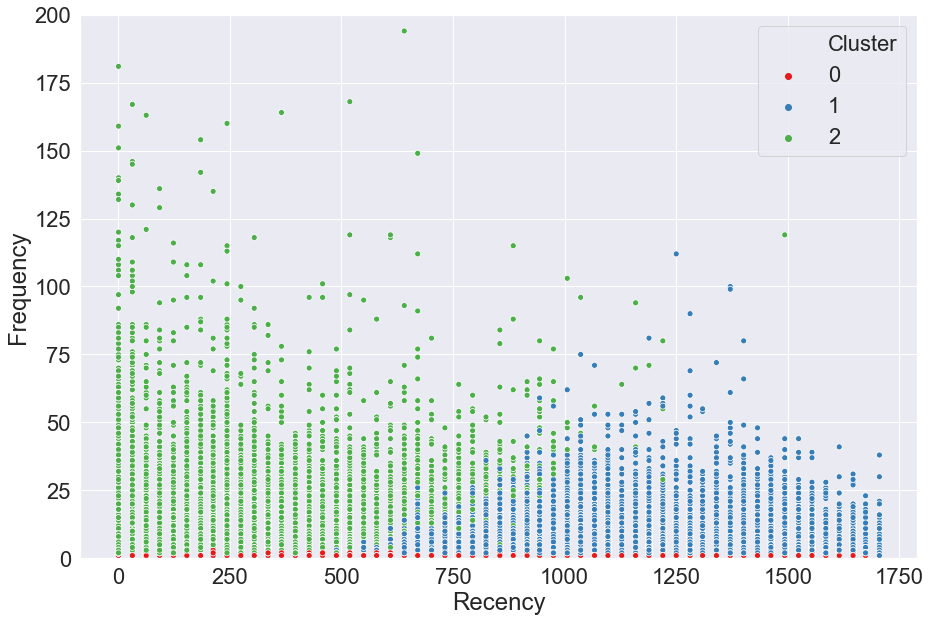

In [96]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=RFM, x="Recency", y="Frequency", hue="Cluster",palette='Set1')
plt.ylim(0,200)
plt.xlabel('Recency'); plt.ylabel('Frequency') 
plt.legend(loc='upper right')

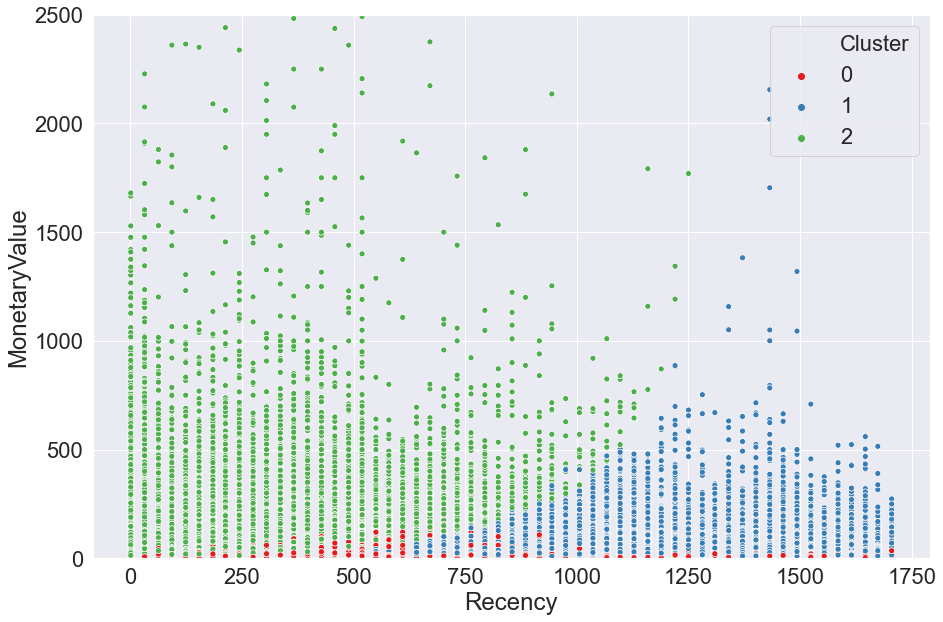

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=RFM, x="Recency", y="MonetaryValue", hue="Cluster",palette='Set1')
plt.ylim(0,2500)
plt.xlabel('Recency'); plt.ylabel('MonetaryValue') 
plt.legend(loc='upper right')

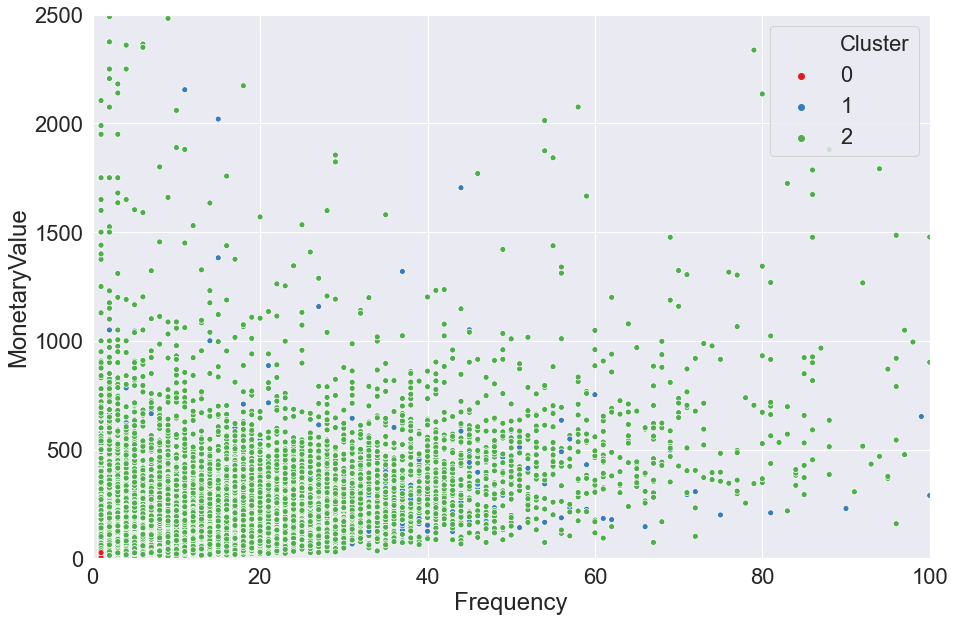

In [98]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=RFM, x="Frequency", y="MonetaryValue", hue="Cluster",palette='Set1')
plt.ylim(0,2500); plt.xlim(0,100);
plt.xlabel('Frequency'); plt.ylabel('MonetaryValue') 
plt.legend(loc='upper right')

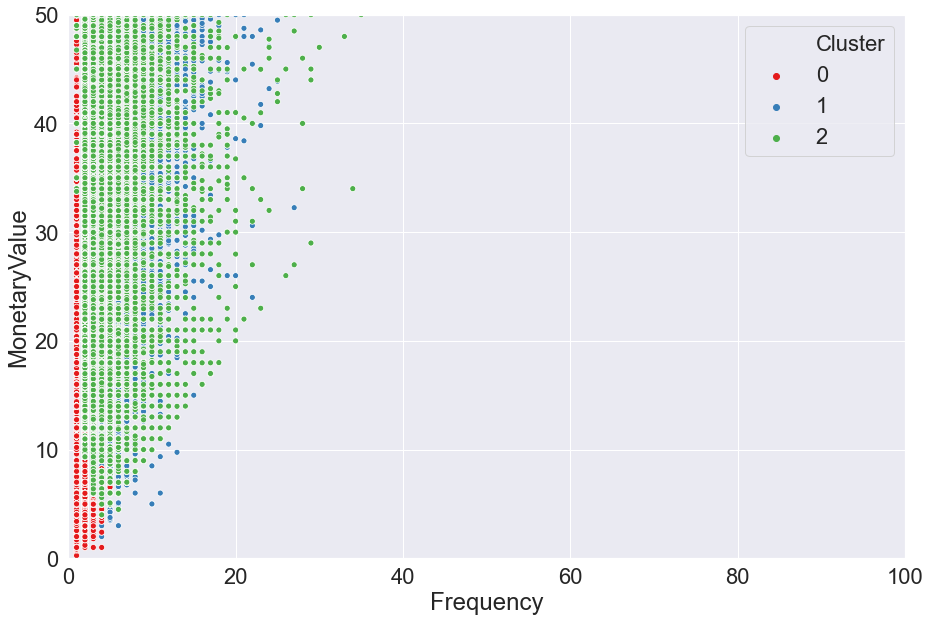

In [99]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=RFM, x="Frequency", y="MonetaryValue", hue="Cluster",palette='Set1')
plt.ylim(0,50); plt.xlim(0,100);
plt.xlabel('Frequency'); plt.ylabel('MonetaryValue') 
plt.legend(loc='upper right')

##### Pivotting

In [100]:
sales.groupby('customer_id')[['product_type','net_sales']]

In [101]:
sales.index.drop

<bound method Index.drop of Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            454540, 454542, 454543, 454544, 454545, 454546, 454547, 454548,
            454549, 454550],
           dtype='int64', length=1362214)>

In [102]:
sales.set_index(['customer_id', 'product_type', 'net_sales'],append=True)

month  \
       customer_id   product_type        net_sales              
0      1744218817    Socks               2.50      2017-01-01   
1      1744218817    Socks               2.50      2017-01-01   
2      5767841034    Sleeve              4.25      2017-01-01   
3      4461189063    Headwrap            0.75      2017-01-01   
4      5767841034    Sleeve              4.25      2017-01-01   
...                                                       ...   
454546 4623156743    Socks               4.00      2021-09-01   
454547 6684451466    Ninja Headband      15.00     2021-09-01   
454548 4983454666    Socks               2.00      2021-09-01   
454549 5190280740957 Purchase Protection 0.98      2021-09-01   
454550 3484751200349 Kids Mask           1.00      2021-09-01   

                                                      customer_name  \
       customer_id   product_type        net_sales                    
0      1744218817    Socks               2.50          Jessica Hite   
1      1744218817    Socks               2.50          Jessica Hite   
2      5767841034    Sleeve              4.25          Bruce Walker   
3      4461189063    Headwrap            0.75         Kelly Hartman   
4      5767841034    Sleeve              4.25          Bruce Walker   
...                                                             ...   
454546 4623156743    Socks               4.00           Kyle Scholl   
454547 6684451466    Ninja Headband      15.00           Bryan Hall   
454548 4983454666    Socks               2.00          James Giggar   
454549 5190280740957 Purchase Protection 0.98        Mike Jeffcoach   
454550 3484751200349 Kids Mask           1.00       Kimberly Bindas   

                                                   billing_country  \
       customer_id   product_type        net_sales                   
0      1744218817    Socks               2.50        United States   
1      1744218817    Socks               2.50        United States   
2      5767841034    Sleeve              4.25        United States   
3      4461189063    Headwrap            0.75        United States   
4      5767841034    Sleeve              4.25        United States   
...                                                            ...   
454546 4623156743    Socks               4.00        United States   
454547 6684451466    Ninja Headband      15.00       United States   
454548 4983454666    Socks               2.00        United States   
454549 5190280740957 Purchase Protection 0.98        United States   
454550 3484751200349 Kids Mask           1.00        United States   

                                                   billing_postal_code  \
       customer_id   product_type        net_sales                       
0      1744218817    Socks               2.50               21740-7021   
1      1744218817    Socks               2.50               21740-7021   
2      5767841034    Sleeve              4.25                    70810   
3      4461189063    Headwrap            0.75                    32955   
4      5767841034    Sleeve              4.25                    70810   
...                                                                ...   
454546 4623156743    Socks               4.00                    99801   
454547 6684451466    Ninja Headband      15.00                   21061   
454548 4983454666    Socks               2.00                    53222   
454549 5190280740957 Purchase Protection 0.98                    93210   
454550 3484751200349 Kids Mask           1.00                    02770   

                                                   billing_region  \
       customer_id   product_type        net_sales                  
0      1744218817    Socks               2.50            Maryland   
1      1744218817    Socks               2.50            Maryland   
2      5767841034    Sleeve              4.25           Louisiana   
3      4461189063    Headwrap            0.75             Florida  

In [103]:
sales_pivot = sales.pivot_table(index='customer_id', columns='product_type', values='net_sales')
sales_pivot

product_type   2-Layer Neck Gaiter  3/4 Tights  Arm Shiver  Back Plate Decal  \
customer_id                                                                    
0                              NaN       13.25     20.3125             10.81   
270354897                      NaN         NaN         NaN               NaN   
278902437                      NaN         NaN         NaN               NaN   
278971193                      NaN         NaN         NaN               NaN   
279089689                      NaN         NaN         NaN               NaN   
...                            ...         ...         ...               ...   
5193320562781                  NaN         NaN         NaN               NaN   
5193320792157                  NaN         NaN         NaN               NaN   
5193321414749                  NaN         NaN         NaN               NaN   
5193321775197                  NaN         NaN         NaN               NaN   
5193322987613                  NaN         NaN         NaN             12.76   

product_type   Baseball Gloves  Basics Shirt  Basics Tank  Bat Grip  \
customer_id                                                           
0                          NaN          14.4          NaN       NaN   
270354897                  NaN           NaN          NaN       NaN   
278902437                  NaN           NaN          NaN       NaN   
278971193                  NaN           NaN          NaN       NaN   
279089689                  NaN           NaN          NaN       NaN   
...                        ...           ...          ...       ...   
5193320562781              NaN           NaN          NaN       NaN   
5193320792157              NaN           NaN          NaN       NaN   
5193321414749              NaN           NaN          NaN       NaN   
5193321775197              NaN           NaN          NaN       NaN   
5193322987613              NaN           NaN          NaN       NaN   

product_type   Batting Gloves  Beanie  ...  Wide Headband  Windbreaker  \
customer_id                            ...                               
0                        12.0     NaN  ...       9.918333          NaN   
270354897                 NaN     NaN  ...            NaN          NaN   
278902437                 NaN     NaN  ...            NaN          NaN   
278971193                 NaN     NaN  ...            NaN          NaN   
279089689                 NaN     NaN  ...            NaN          NaN   
...                       ...     ...  ...            ...          ...   
5193320562781             NaN     NaN  ...            NaN          NaN   
5193320792157             NaN     NaN  ...            NaN          NaN   
5193321414749             NaN     NaN  ...            NaN          NaN   
5193321775197             NaN     NaN  ...            NaN          NaN   
5193322987613             NaN     NaN  ...            NaN          NaN   

product_type   Winter Headband  Wristband  Yoga Pants  Yoga Test  \
customer_id                                                        
0                          NaN  11.666667   18.857143        NaN   
270354897                  NaN        NaN         NaN        NaN   
278902437                  NaN        NaN         NaN        NaN   
278971193                  NaN        NaN         NaN        NaN   
279089689                  NaN        NaN         NaN        NaN   
...                        ...        ...         ...        ...   
5193320562781              NaN        NaN         NaN        NaN   
5193320792157              NaN        NaN         NaN        NaN   
5193321414749              NaN        NaN         NaN        NaN   
5193321775197              NaN        NaN         NaN        NaN   
5193322987613              NaN        NaN         NaN        NaN   

product_type   customization service  quick-dry jersey  treDCAL  zakeke-design  
customer_id                                                                     
0                        

In [104]:
sales_pivot['Cluster'] = RFM_knn_3['Cluster']
sales_pivot.head(4)

product_type  2-Layer Neck Gaiter  3/4 Tights  Arm Shiver  Back Plate Decal  \
customer_id                                                                   
0                             NaN       13.25     20.3125             10.81   
270354897                     NaN         NaN         NaN               NaN   
278902437                     NaN         NaN         NaN               NaN   
278971193                     NaN         NaN         NaN               NaN   

product_type  Baseball Gloves  Basics Shirt  Basics Tank  Bat Grip  \
customer_id                                                          
0                         NaN          14.4          NaN       NaN   
270354897                 NaN           NaN          NaN       NaN   
278902437                 NaN           NaN          NaN       NaN   
278971193                 NaN           NaN          NaN       NaN   

product_type  Batting Gloves  Beanie  ...  Windbreaker  Winter Headband  \
customer_id                           ...                                 
0                       12.0     NaN  ...          NaN              NaN   
270354897                NaN     NaN  ...          NaN              NaN   
278902437                NaN     NaN  ...          NaN              NaN   
278971193                NaN     NaN  ...          NaN              NaN   

product_type  Wristband  Yoga Pants  Yoga Test  customization service  \
customer_id                                                             
0             11.666667   18.857143        NaN               8.333333   
270354897           NaN         NaN        NaN                    NaN   
278902437           NaN         NaN        NaN                    NaN   
278971193           NaN         NaN        NaN                    NaN   

product_type  quick-dry jersey  treDCAL  zakeke-design  Cluster  
customer_id                                                      
0                          NaN      NaN            NaN        2  
270354897                  NaN      NaN            NaN        0  
278902437                  NaN      NaN            NaN        0  
278971193                  NaN      NaN            NaN        1  

[4 rows x 150 columns]

In [105]:
sales_byProduct_segmented = sales_pivot.reset_index().drop('customer_id',axis=1)
sales_byProduct_segmented.head(4)

product_type  2-Layer Neck Gaiter  3/4 Tights  Arm Shiver  Back Plate Decal  \
0                             NaN       13.25     20.3125             10.81   
1                             NaN         NaN         NaN               NaN   
2                             NaN         NaN         NaN               NaN   
3                             NaN         NaN         NaN               NaN   

product_type  Baseball Gloves  Basics Shirt  Basics Tank  Bat Grip  \
0                         NaN          14.4          NaN       NaN   
1                         NaN           NaN          NaN       NaN   
2                         NaN           NaN          NaN       NaN   
3                         NaN           NaN          NaN       NaN   

product_type  Batting Gloves  Beanie  ...  Windbreaker  Winter Headband  \
0                       12.0     NaN  ...          NaN              NaN   
1                        NaN     NaN  ...          NaN              NaN   
2                        NaN     NaN  ...          NaN              NaN   
3                        NaN     NaN  ...          NaN              NaN   

product_type  Wristband  Yoga Pants  Yoga Test  customization service  \
0             11.666667   18.857143        NaN               8.333333   
1                   NaN         NaN        NaN                    NaN   
2                   NaN         NaN        NaN                    NaN   
3                   NaN         NaN        NaN                    NaN   

product_type  quick-dry jersey  treDCAL  zakeke-design  Cluster  
0                          NaN      NaN            NaN        2  
1                          NaN      NaN            NaN        0  
2                          NaN      NaN            NaN        0  
3                          NaN      NaN            NaN        1  

[4 rows x 150 columns]

In [106]:
# Avg Sales for each Product by Segment
sales_byProduct_segmented.groupby('Cluster').mean().round(0)

product_type  2-Layer Neck Gaiter  3/4 Tights  Arm Shiver  Back Plate Decal  \
Cluster                                                                       
0                            19.0        18.0        11.0              13.0   
1                             NaN        16.0         9.0              11.0   
2                            23.0        14.0        11.0              14.0   

product_type  Baseball Gloves  Basics Shirt  Basics Tank  Bat Grip  \
Cluster                                                              
0                        25.0          15.0          6.0       8.0   
1                        25.0          13.0          6.0       NaN   
2                        25.0          13.0          5.0       8.0   

product_type  Batting Gloves  Beanie  ...  Wide Headband  Windbreaker  \
Cluster                               ...                               
0                       18.0     6.0  ...           12.0         26.0   
1                       14.0     3.0  ...            8.0         26.0   
2                       13.0     3.0  ...           12.0         25.0   

product_type  Winter Headband  Wristband  Yoga Pants  Yoga Test  \
Cluster                                                           
0                        10.0        7.0        21.0        NaN   
1                         7.0        3.0        18.0        NaN   
2                         7.0        6.0        21.0       35.0   

product_type  customization service  quick-dry jersey  treDCAL  zakeke-design  
Cluster                                                                        
0                               5.0               NaN     21.0           18.0  
1                               7.0              25.0     21.0           20.0  
2                               8.0              22.0     21.0           46.0  

[3 rows x 149 columns]

##### what products each cluster buys the most

In [268]:
sales_byProduct_segmented.groupby('Cluster').sum().round(0)

product_type  2-Layer Neck Gaiter  3/4 Tights  Arm Shiver  Back Plate Decal  \
Cluster                                                                       
0                         18193.0     16347.0     29415.0           28716.0   
1                             0.0     66650.0     22862.0           10823.0   
2                         41791.0     53028.0     70654.0           54177.0   

product_type  Baseball Gloves  Basics Shirt  Basics Tank  Bat Grip  \
Cluster                                                              
0                        25.0        2565.0          6.0      67.0   
1                        50.0       21139.0        163.0       0.0   
2                        25.0        4721.0         47.0     758.0   

product_type  Batting Gloves  Beanie  ...  Wide Headband  Windbreaker  \
Cluster                               ...                               
0                     6408.0    78.0  ...       201109.0       4993.0   
1                    20385.0   606.0  ...       334118.0      16960.0   
2                     4795.0   182.0  ...       299590.0       4558.0   

product_type  Winter Headband  Wristband  Yoga Pants  Yoga Test  \
Cluster                                                           
0                       340.0    23117.0      2339.0        0.0   
1                      2019.0    29049.0     14607.0        0.0   
2                       900.0    45248.0      5777.0       35.0   

product_type  customization service  quick-dry jersey  treDCAL  zakeke-design  
Cluster                                                                        
0                            2935.0               0.0    340.0          146.0  
1                           59579.0             204.0    440.0          118.0  
2                           18352.0              65.0    600.0          230.0  

[3 rows x 149 columns]

In [271]:
# Cluster 2, Top 10
sales_byProduct_segmented.groupby('Cluster').sum().round(0).loc[2,].sort_values(ascending=False)[:10]

product_type
Visor                      799952.0
Neck Gaiter                668108.0
Mask With Nose Shape       413875.0
Sleeve                     391863.0
Football Leg Sleeves       338538.0
Spats                      310124.0
Wide Headband              299590.0
Mask With Filter Pocket    231917.0
Kids Mask                  192671.0
Tights                     176332.0
Name: 2, dtype: float64

In [272]:
# Cluster 2, Top 10
sales_byProduct_segmented.groupby('Cluster').sum().round(0).loc[1,].sort_values(ascending=False)[:10]

product_type
Sleeve           451839.0
Wide Headband    334118.0
Tights           329392.0
Spats            291700.0
Shorts           155665.0
Socks             83700.0
Kids Tights       83210.0
Hoodie            78578.0
Visor             74324.0
3/4 Tights        66650.0
Name: 1, dtype: float64

In [273]:
# Cluster 3, Top 10
sales_byProduct_segmented.groupby('Cluster').sum().round(0).loc[0,].sort_values(ascending=False)[:10]

product_type
Neck Gaiter                479163.0
Visor                      440984.0
Sleeve                     294029.0
Wide Headband              201109.0
Spats                      182868.0
Mask With Nose Shape       167729.0
Football Leg Sleeves       146519.0
Tights                     137613.0
DD56                       122775.0
Mask With Filter Pocket     95523.0
Name: 0, dtype: float64

In [283]:
top_products_byCluster= pd.DataFrame(index=range(1,11),columns=['Cluster 0','Cluster 1','Cluster 2'])
top_products_byCluster

Cluster 0 Cluster 1 Cluster 2
1        NaN       NaN       NaN
2        NaN       NaN       NaN
3        NaN       NaN       NaN
4        NaN       NaN       NaN
5        NaN       NaN       NaN
6        NaN       NaN       NaN
7        NaN       NaN       NaN
8        NaN       NaN       NaN
9        NaN       NaN       NaN
10       NaN       NaN       NaN

In [284]:
for i in range(0,3):
    top_products_byCluster.iloc[:,i] = (sales_byProduct_segmented.groupby('Cluster').sum().round(0).loc[i,].sort_values(ascending=False)[:10]).index

top_products_byCluster

Cluster 0      Cluster 1                Cluster 2
1               Neck Gaiter         Sleeve                    Visor
2                     Visor  Wide Headband              Neck Gaiter
3                    Sleeve         Tights     Mask With Nose Shape
4             Wide Headband          Spats                   Sleeve
5                     Spats         Shorts     Football Leg Sleeves
6      Mask With Nose Shape          Socks                    Spats
7      Football Leg Sleeves    Kids Tights            Wide Headband
8                    Tights         Hoodie  Mask With Filter Pocket
9                      DD56          Visor                Kids Mask
10  Mask With Filter Pocket     3/4 Tights                   Tights

#####  Chart

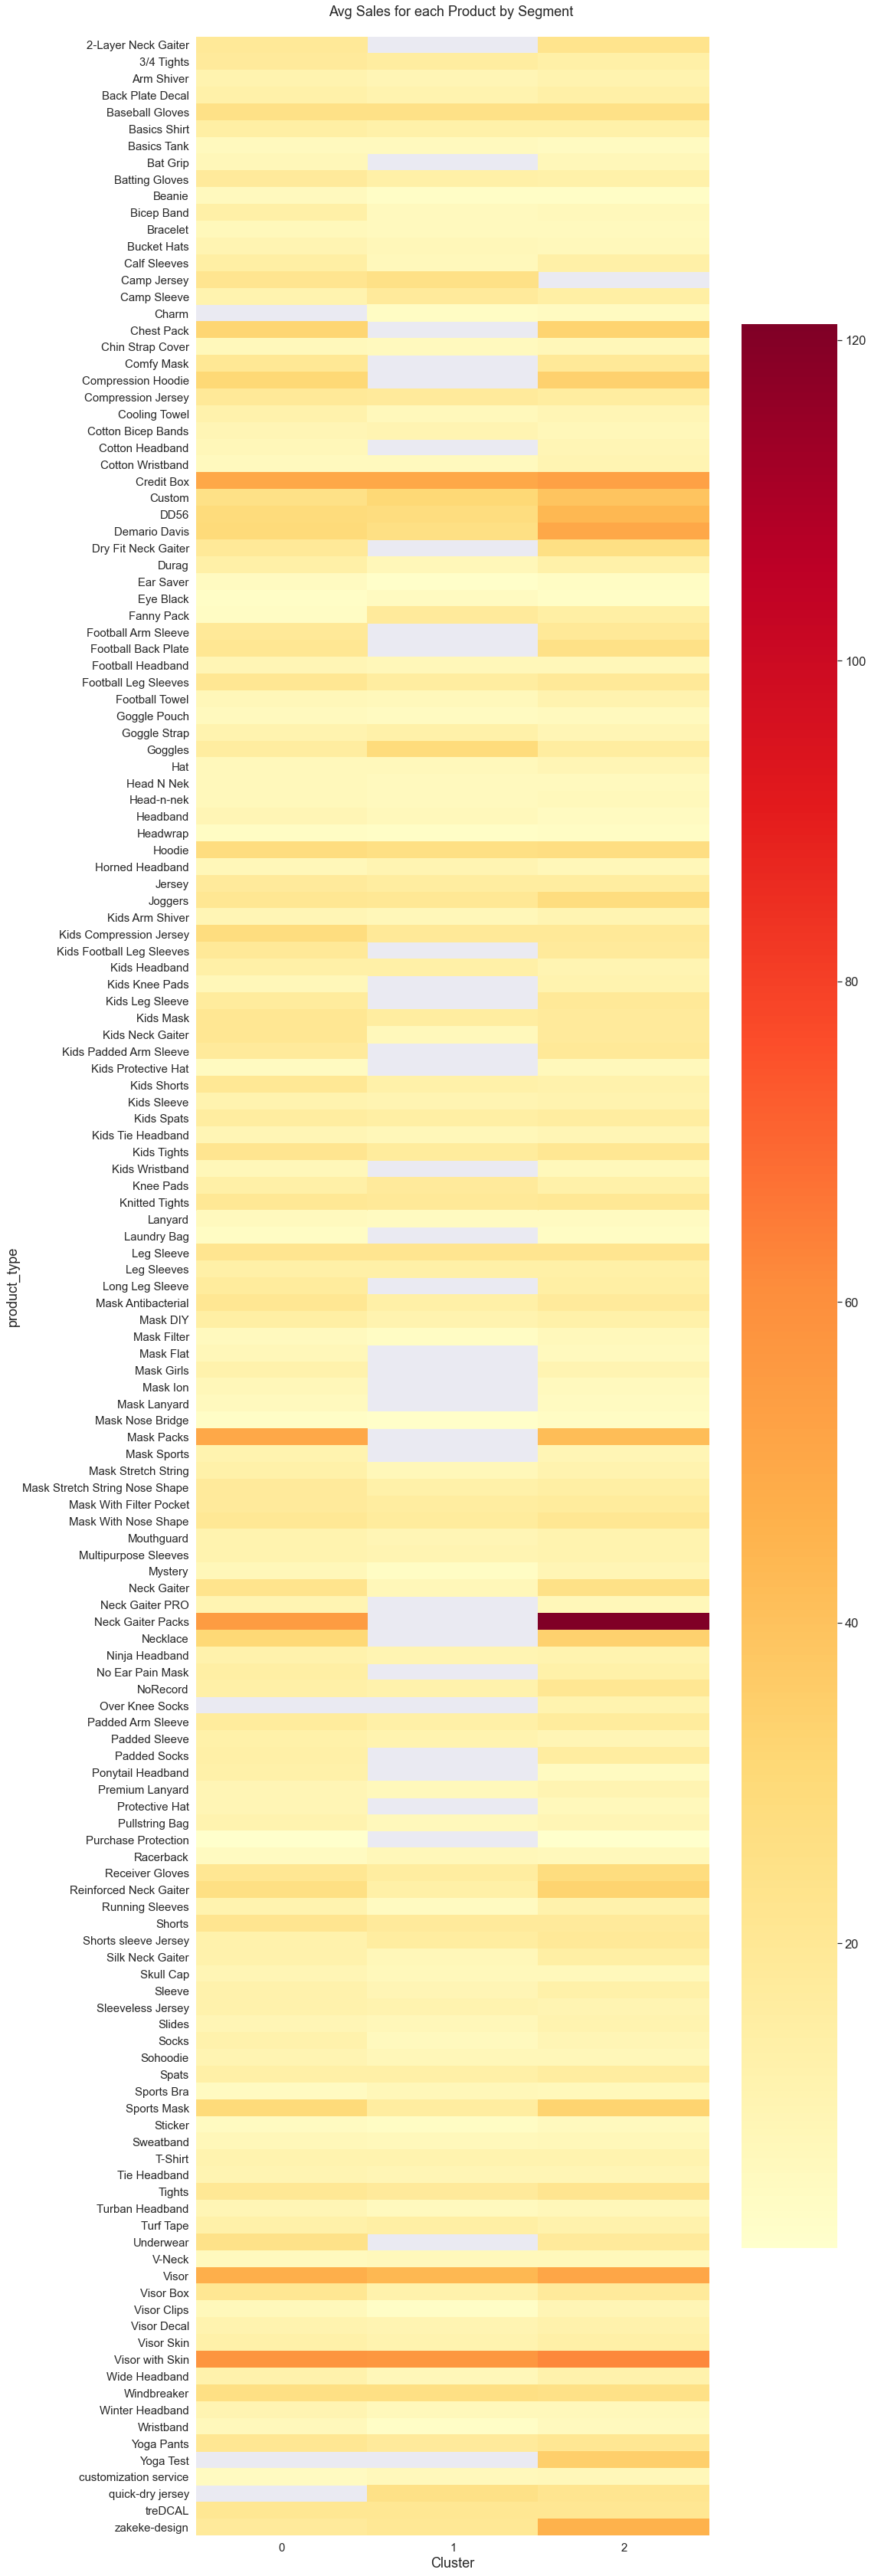

In [107]:
plt.figure(figsize=(15,60))
sns.set(font_scale=1.5)

plt.title('Avg Sales for each Product by Segment \n')

sns.set(font_scale=1.5)
ax = sns.heatmap(sales_byProduct_segmented.groupby('Cluster').mean().round(0).T, cmap='YlOrRd')

ax.tick_params(axis='both', which='major', labelsize=15, labelbottom=True, bottom=False, top=False, labeltop=False)

fig = ax.get_figure()
fig.savefig("ProductSalesBySegment.png") 

#plt.show()

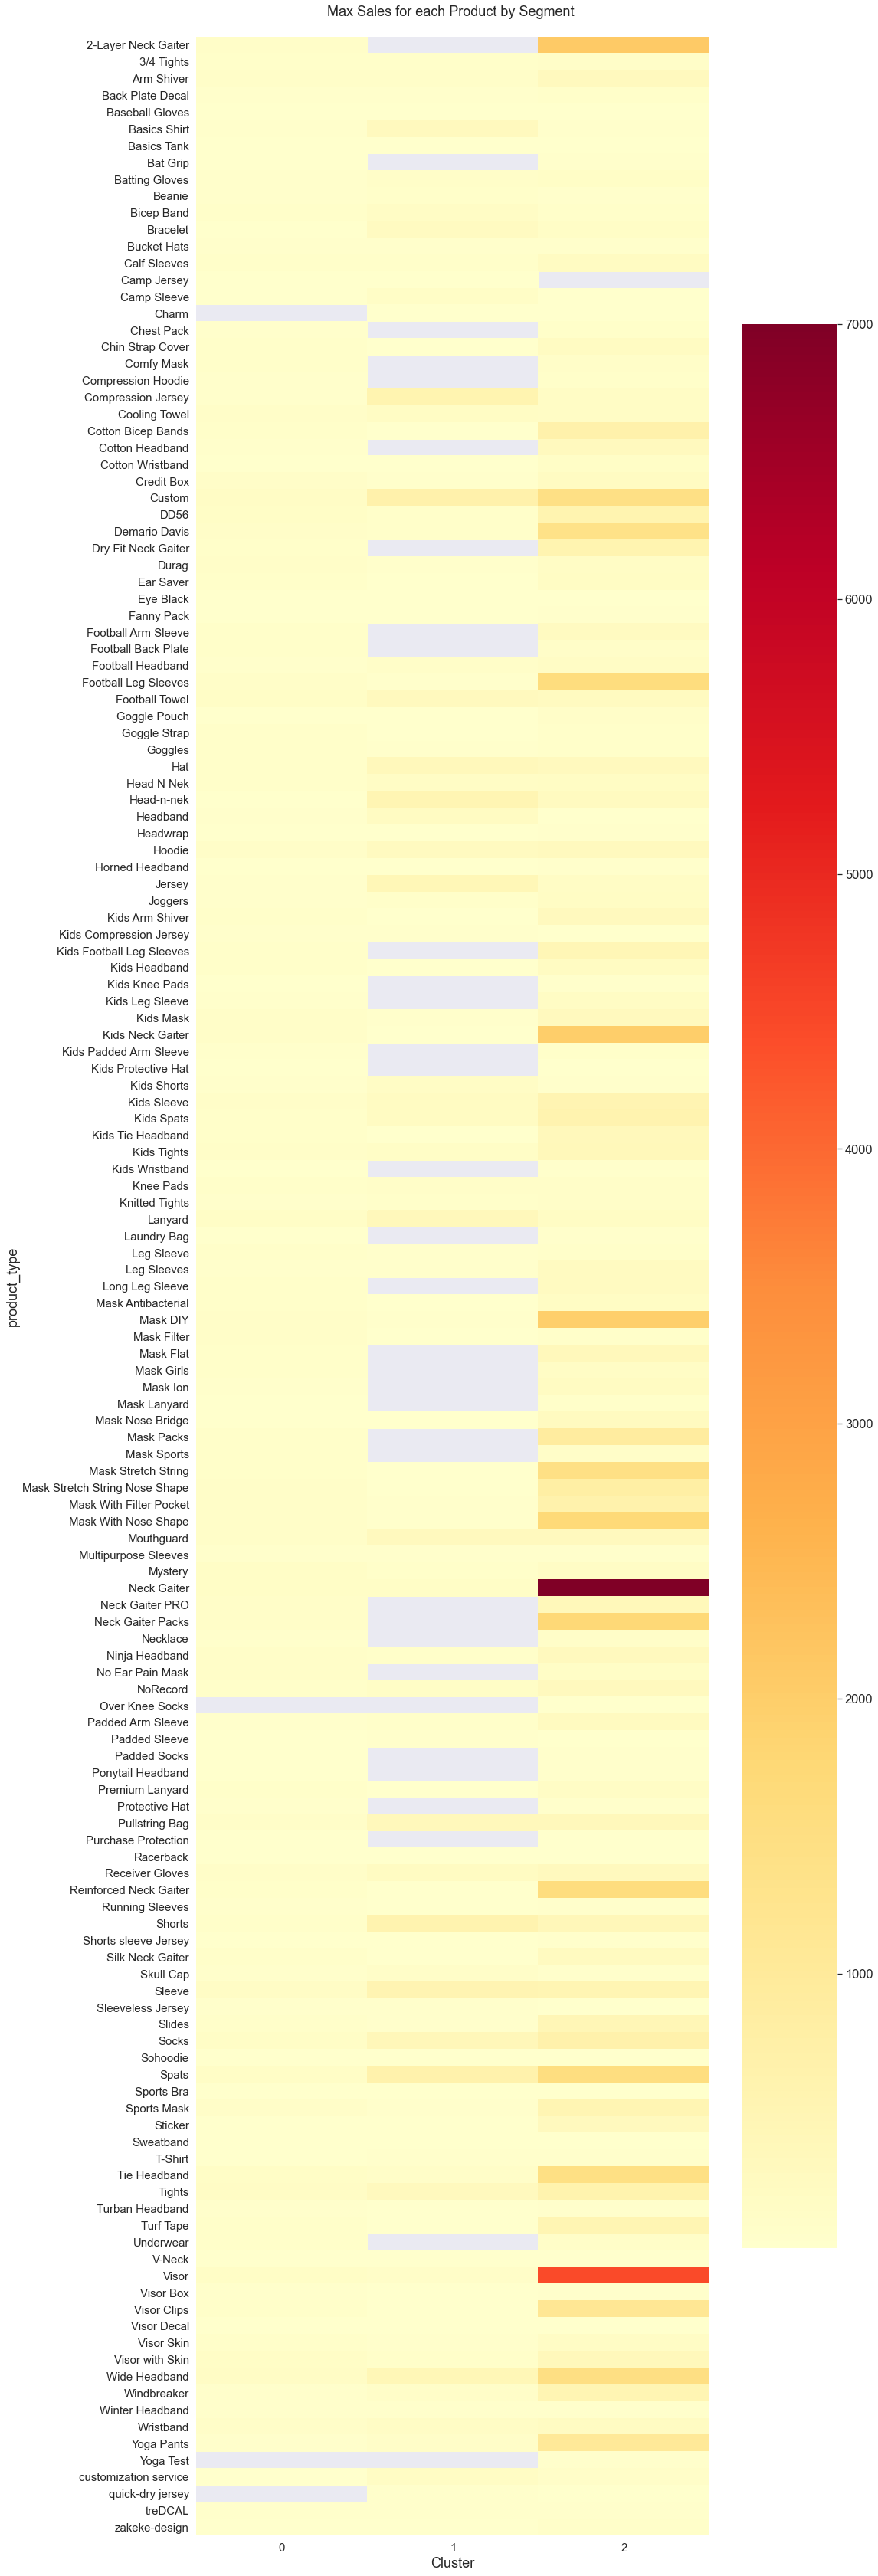

In [108]:
plt.figure(figsize=(15,60))
sns.set(font_scale=1.5)

plt.title('Max Sales for each Product by Segment \n')

sns.set(font_scale=1.5)
ax = sns.heatmap(sales_byProduct_segmented.groupby('Cluster').max().round(0).T, cmap='YlOrRd')

ax.tick_params(axis='both', which='major', labelsize=15, labelbottom=True, bottom=False, top=False, labeltop=False)

fig = ax.get_figure()
fig.savefig("MaxProductSalesBySegment.png") 

#plt.show()

In [109]:
# Coordinates of cluster centers.
display(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(10, 3)

array([[-0.81897737, -1.11277793, -1.06400988],
       [ 0.91110291,  1.25817819,  0.95599999],
       [-0.35228345, -1.14887469,  0.25308554],
       [-1.02837186,  1.51163817,  1.6610289 ],
       [ 1.12469782,  0.41328245, -0.28301331],
       [ 0.95773396, -0.94998373, -1.931164  ],
       [-0.28615671,  0.53562367,  0.76546148],
       [-0.17895352,  0.21769266, -0.38002138],
       [ 0.85872336, -1.14887469, -0.52366803],
       [-1.61829168,  0.48953794,  0.14001208]])

In [110]:
# Sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

232904.6109816787

In [111]:
kmeans.labels_

array([3, 0, 5, ..., 9, 9, 9])

Text(0, 0.5, 'Mask Packs')

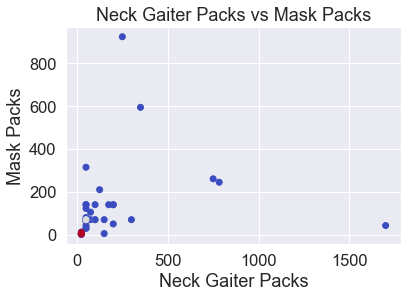

In [112]:
plt.scatter(sales_byProduct_segmented.loc[:,'Neck Gaiter Packs'],sales_byProduct_segmented.loc[:,'Mask Packs'],
            c=kmeans.labels_,cmap='coolwarm')
plt.title('Neck Gaiter Packs vs Mask Packs')
plt.xlabel('Neck Gaiter Packs'); plt.ylabel('Mask Packs')

### Snake Plot

In [113]:
RFM_normalized['Cluster'] = RFM_knn_3['Cluster']
RFM_normalized.head(4)

Recency  Frequency  MonetaryValue  Cluster
customer_id                                             
0            0.059055   2.729388       5.815883        2
270354897   -1.521292  -1.148875      -0.679094        0
278902437    1.617869  -1.148875      -3.435979        0
278971193    1.724158   1.342511       0.902264        1

In [114]:
RFM_melt = pd.melt(RFM_normalized.reset_index(),
                   id_vars=['customer_id', 'Cluster'],
                   value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                   var_name='Attribute',
                   value_name='Value')

RFM_melt

customer_id  Cluster      Attribute     Value
0                    0        2        Recency  0.059055
1            270354897        0        Recency -1.521292
2            278902437        0        Recency  1.617869
3            278971193        1        Recency  1.724158
4            279089689        0        Recency  1.111085
...                ...      ...            ...       ...
1188166  5193320562781        2  MonetaryValue -0.840034
1188167  5193320792157        2  MonetaryValue  0.114389
1188168  5193321414749        2  MonetaryValue  0.079696
1188169  5193321775197        2  MonetaryValue -0.118780
1188170  5193322987613        2  MonetaryValue -0.788836

[1188171 rows x 4 columns]

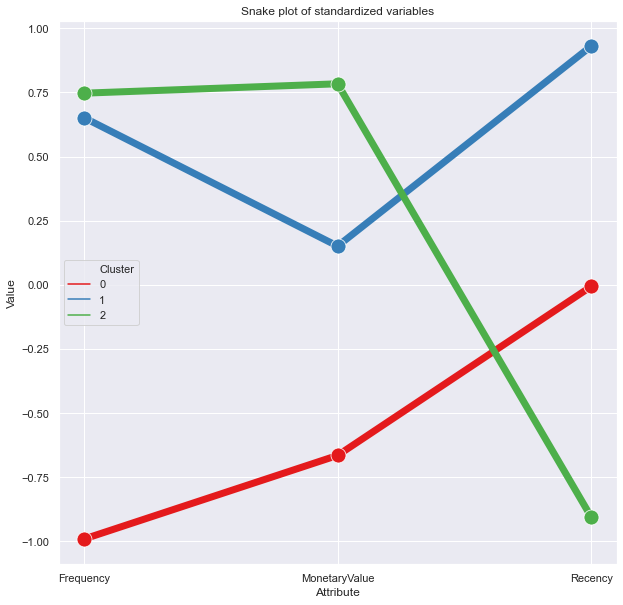

In [115]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=RFM_melt,palette='Set1',marker='o',linewidth = 7,markersize=15)

### Relative Importance of Segment Attributes

In [116]:
RFM_knn_3[['Recency','Frequency','MonetaryValue','Cluster']]

Recency  Frequency  MonetaryValue  Cluster
customer_id                                              
0                  579        675       11528.17        2
270354897           63          1          15.00        0
278902437         1615          1           1.40        0
278971193         1705          7          65.00        1
279089689         1220          1          20.00        0
...                ...        ...            ...      ...
5193320562781        1          2          12.98        2
5193320792157        1          3          30.98        2
5193321414749        1          2          30.00        2
5193321775197        1          3          24.98        2
5193322987613        1          2          13.59        2

[396057 rows x 4 columns]

In [117]:
RFM

month  Recency  Frequency  MonetaryValue  R  F  M  \
customer_id                                                            
0             2020-02-01      579        675       11528.17  2  3  4   
270354897     2021-07-01       63          1          15.00  4  1  1   
278902437     2017-04-01     1615          1           1.40  1  1  1   
278971193     2017-01-01     1705          7          65.00  1  3  4   
279089689     2018-05-01     1220          1          20.00  1  1  2   
...                  ...      ...        ...            ... .. .. ..   
5193320562781 2021-09-01        1          2          12.98  4  1  1   
5193320792157 2021-09-01        1          3          30.98  4  2  3   
5193321414749 2021-09-01        1          2          30.00  4  1  3   
5193321775197 2021-09-01        1          3          24.98  4  2  2   
5193322987613 2021-09-01        1          2          13.59  4  1  1   

              RFM_Segment  RFM_Score  Cluster  
customer_id                                    
0                     234        9.0        2  
270354897             411        6.0        0  
278902437             111        3.0        0  
278971193             134        8.0        1  
279089689             112        4.0        0  
...                   ...        ...      ...  
5193320562781         411        6.0        2  
5193320792157         423        9.0        2  
5193321414749         413        8.0        2  
5193321775197         422        8.0        2  
5193322987613         411        6.0        2  

[396057 rows x 10 columns]

In [118]:
cluster_avg = RFM_knn_3[['Recency','Frequency','MonetaryValue','Cluster']].groupby(['Cluster']).mean()
cluster_avg

Recency  Frequency  MonetaryValue
Cluster                                       
0         625.974475   1.137292      19.787143
1        1117.428354   4.316802      41.777026
2         249.464616   5.798479      85.133226

In [119]:
population_avg = RFM[['Recency','Frequency','MonetaryValue']].mean()
population_avg

Recency          657.586365
Frequency          3.439439
MonetaryValue     45.494810
dtype: float64

In [120]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.05      -0.67          -0.57
1           0.70       0.26          -0.08
2          -0.62       0.69           0.87

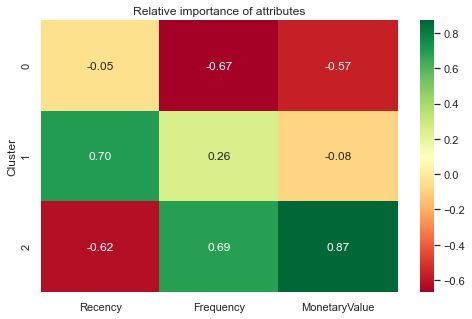

In [121]:
plt.figure(figsize=(8, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Summary

In [122]:
RFM[['RFM_Score']]

RFM_Score
customer_id             
0                    9.0
270354897            6.0
278902437            3.0
278971193            8.0
279089689            4.0
...                  ...
5193320562781        6.0
5193320792157        9.0
5193321414749        8.0
5193321775197        8.0
5193322987613        6.0

[396057 rows x 1 columns]

In [123]:
clients = sales[['customer_id','customer_name','billing_region','billing_country']]

In [124]:
clients = clients.drop_duplicates('customer_id')

In [125]:
clients.head()

customer_id   customer_name billing_region billing_country
0    1744218817    Jessica Hite       Maryland   United States
2    5767841034    Bruce Walker      Louisiana   United States
3    4461189063   Kelly Hartman        Florida   United States
9    5886055754  Nicole Lawless       New York   United States
13   5930528330    Quinn Koller        Florida   United States

In [126]:
clients = clients.set_index('customer_id')

In [127]:
clients['RFM_Score'] = RFM['RFM_Score']

In [128]:
clients['Cluster'] = RFM_knn_3['Cluster']

In [129]:
clients

customer_name  billing_region billing_country  RFM_Score  \
customer_id                                                                  
1744218817         Jessica Hite        Maryland   United States       10.0   
5767841034         Bruce Walker       Louisiana   United States        8.0   
4461189063        Kelly Hartman         Florida   United States       10.0   
5886055754       Nicole Lawless        New York   United States        6.0   
5930528330         Quinn Koller         Florida   United States        4.0   
...                         ...             ...             ...        ...   
5189418614877  Christopher Degn  South Carolina   United States        7.0   
5185134657629       Shane Baker         Georgia   United States        6.0   
5187672932445    Connor Sobieri     Connecticut   United States        9.0   
5183394480221  Jennifer Ashford        Oklahoma   United States        8.0   
5187498639453    Summer Foreman         Florida   United States        9.0   

               Cluster  
customer_id             
1744218817           2  
5767841034           1  
4461189063           2  
5886055754           1  
5930528330           0  
...                ...  
5189418614877        0  
5185134657629        0  
5187672932445        2  
5183394480221        2  
5187498639453        2  

[396057 rows x 5 columns]

### Top Clients

In [130]:
top = clients[clients['RFM_Score']>9]
top

customer_name billing_region billing_country  RFM_Score  \
customer_id                                                                 
1744218817         Jessica Hite       Maryland   United States       10.0   
4461189063        Kelly Hartman        Florida   United States       10.0   
5809322186             Joe Ruiz     California   United States       11.0   
3111829895         Cody Lockett       Colorado   United States       11.0   
5944248074         jeremy smith       Oklahoma   United States       11.0   
...                         ...            ...             ...        ...   
5182789222493   Chad  Whitworth        Wyoming   United States       10.0   
5192403615837   Damien McCarthy       Michigan   United States       10.0   
5188658331741      Monique Burt       Michigan   United States       10.0   
5186536931421      Reed Swanson     New Jersey   United States       10.0   
5191712866397  Kristin Huckfelt          Texas   United States       10.0   

               Cluster  
customer_id             
1744218817           2  
4461189063           2  
5809322186           2  
3111829895           2  
5944248074           2  
...                ...  
5182789222493        2  
5192403615837        2  
5188658331741        2  
5186536931421        2  
5191712866397        2  

[44463 rows x 5 columns]

In [131]:
# How many of the Top CLients belong to Cluster #2
top['Cluster'].value_counts()

2    44463
Name: Cluster, dtype: int64

In [132]:
# distribution of Billing Region among Top clients
clients[clients['RFM_Score']>9]['billing_region'].value_counts(ascending=False)

Texas           4605
California      3946
Florida         3280
Pennsylvania    2305
New York        2197
                ... 
Veracruz           1
Tarragona          1
Auckland           1
Cádiz              1
Nelson             1
Name: billing_region, Length: 118, dtype: int64

In [133]:
# distribution of RFM SCore among Cluster#2 clients
clients[clients['Cluster']==2]['RFM_Score'].value_counts().sort_index()

6.0      1305
7.0     17246
8.0     25838
9.0     28208
10.0    21218
11.0    23245
Name: RFM_Score, dtype: int64

In [134]:
# distribution of RFM SCore among Cluster#1 clients
clients[clients['Cluster']==1]['RFM_Score'].value_counts().sort_index()

3.0     5995
4.0    13019
5.0    24515
6.0    25226
7.0    20888
8.0    18630
9.0     6884
Name: RFM_Score, dtype: int64

In [135]:
# distribution of RFM SCore among Cluster#0 clients
clients[clients['Cluster']==0]['RFM_Score'].value_counts().sort_index()

3.0    22547
4.0    29132
5.0    31002
6.0    44499
7.0    27476
8.0     7973
9.0     1211
Name: RFM_Score, dtype: int64

### Averages

In [137]:
RFM.head()

month  Recency  Frequency  MonetaryValue  R  F  M  \
customer_id                                                          
0           2020-02-01      579        675       11528.17  2  3  4   
270354897   2021-07-01       63          1          15.00  4  1  1   
278902437   2017-04-01     1615          1           1.40  1  1  1   
278971193   2017-01-01     1705          7          65.00  1  3  4   
279089689   2018-05-01     1220          1          20.00  1  1  2   

            RFM_Segment  RFM_Score  Cluster  
customer_id                                  
0                   234        9.0        2  
270354897           411        6.0        0  
278902437           111        3.0        0  
278971193           134        8.0        1  
279089689           112        4.0        0

In [146]:
# Avg Recency by Cluster 
RFM.reset_index().groupby('Cluster')['Recency'].mean().round(0)

Cluster
0     626.0
1    1117.0
2     249.0
Name: Recency, dtype: float64

In [147]:
# Avg Frequency by Cluster 
RFM.reset_index().groupby('Cluster')['Frequency'].mean().round(1)

Cluster
0    1.1
1    4.3
2    5.8
Name: Frequency, dtype: float64

In [149]:
# Avg MonetaryValue by Cluster 
RFM.reset_index().groupby('Cluster')['MonetaryValue'].mean().round(0)

Cluster
0    20.0
1    42.0
2    85.0
Name: MonetaryValue, dtype: float64